## **Bike Sharing**

#### **Capstone 3**

# **1. Introduction**

### **1.1 Background**
Seiring pertumbuhan wilayah perkotaan dan meningkatnya kesadaran lingkungan, sistem berbagi sepeda telah menjadi moda transportasi yang populer dan berkelanjutan di banyak kota. Untuk mengoptimalkan operasional dan meningkatkan kepuasan pengguna, penting untuk memahami pola penggunaan sepeda. Data historis dari sistem berbagi sepeda dapat dimanfaatkan untuk membangun model prediktif yang memperkirakan permintaan penyewaan sepeda berdasarkan berbagai faktor seperti kondisi cuaca, musim, dan variabel terkait waktu.

### **1.2 Problem Statement**
Penyedia layanan berbagi sepeda menghadapi tantangan dalam mengelola distribusi sepeda secara efisien di berbagai stasiun. Prediksi permintaan yang tidak akurat dapat menyebabkan kekosongan atau kelebihan sepeda di lokasi tertentu, sehingga mengurangi kualitas layanan. Oleh karena itu, diperlukan model machine learning yang andal untuk memprediksi jumlah harian penyewaan sepeda (cnt) dengan memanfaatkan fitur lingkungan dan temporal secara akurat.

### **1.3 Approach**
Untuk mengatasi tantangan ini, akan diterapkan pipeline machine learning berikut:
- Exploratory Data Analysis (EDA) – Menganalisis data untuk memahami distribusi, tren, pola musiman, korelasi, serta mendeteksi anomali atau nilai yang hilang.
- Pra-pemrosesan Data – Melakukan pembersihan data, normalisasi, encoding kategorikal, dan feature engineering.

- Pemodelan – Menerapkan algoritma regresi seperti Linear Regression, Random Forest, dan Gradient Boosting untuk memprediksi total jumlah penyewaan sepeda (cnt).

- Evaluasi – Menggunakan metrik kinerja seperti RMSE (Root Mean Squared Error) dan R² Score untuk mengukur akurasi model.

- Deploy Model  – Mengembangkan pipeline prediksi untuk penggunaan real-time atau batch guna mendukung pengambilan keputusan operasional.
### **1.4 Goal**
Tujuan proyek ini adalah mengembangkan model machine learning yang akurat untuk memprediksi jumlah harian penyewaan sepeda berdasarkan data cuaca, musim, dan temporal. Model ini diharapkan dapat membantu penyedia layanan berbagi sepeda mengoptimalkan alokasi sumber daya dan meningkatkan efisiensi layanan secara keseluruhan.




### **2. Import Package and Import Data**

#### **2.1 Import necessaries library**

- Berikut adalah librari yang saya gunakan untuk analisis Machine learning

In [391]:
# Basic Libraries
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.colors as mcolors

# Statistical Tests
from scipy.stats import normaltest, chi2_contingency

# Preprocessing
from sklearn.preprocessing import (
    OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler,
    LabelEncoder, KBinsDiscretizer
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder

# Model Selection
from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_validate,
    GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
)

# Models
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet,
    SGDRegressor, RidgeCV
)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor,
    ExtraTreesRegressor, BaggingRegressor,
    AdaBoostRegressor, VotingRegressor, StackingRegressor
)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
# Metrics
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error,
    r2_score, mean_absolute_percentage_error,
    mean_squared_log_error, classification_report,
    confusion_matrix, make_scorer, fbeta_score,
    precision_score, recall_score, accuracy_score
)
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor

# Explainability
import shap

#### **2.2 Read Data**

In [392]:
df = pd.read_csv("data_bike_sharing.csv")

#lower case and non space

df.columns = df.columns.str.lower().str.replace(r'[^\w]', '', regex=True) #menghilangkan spasi dan membuat semua huruf dalam colomn menjadi lower case

df.head

<bound method NDFrame.head of            dteday   hum  weathersit  holiday  season   atemp  temp  hr  \
0      2011-12-09  0.62           1        0       4  0.3485  0.36  16   
1      2012-06-17  0.64           1        0       2  0.5152  0.54   4   
2      2011-06-15  0.53           1        0       2  0.6212  0.62  23   
3      2012-03-31  0.87           2        0       2  0.3485  0.36   8   
4      2012-07-31  0.55           1        0       3  0.6970  0.76  18   
5      2012-10-01  0.72           1        0       4  0.4545  0.46   0   
6      2012-08-28  0.54           1        0       3  0.6515  0.70  22   
7      2012-01-01  0.93           1        0       1  0.2727  0.26   9   
8      2011-10-13  1.00           2        0       4  0.5152  0.54   4   
9      2012-06-09  0.24           1        0       2  0.6970  0.82  16   
10     2011-06-28  0.78           1        0       3  0.6061  0.66   5   
11     2011-12-21  1.00           2        0       1  0.4394  0.44  18   
12     2

In [393]:
df.info(), df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


(None, (12165, 11))

- Data set Bike Sharing terdiri dari 11 kolom , dan 12.165 data(baris)

### **3. Data Understanding**

### **3.1. Dataset Overview**

Dataset terdiri dari beberapa fitur termasuk tanggal, musim, kondisi cuaca, suhu, dan jumlah penyewaan sepeda. Setiap baris merepresentasikan rekaman harian yang telah diagregasi.

### **3.2. Feature Description**

| Feature        | Description |
|----------------|-------------|
| dteday       | Date of the record (YYYY-MM-DD) |
| season       | Season (1: spring, 2: summer, 3: fall, 4: winter) |
| holiday      | Whether the day is a public holiday (1) or not (0) |
| weathersit   | Weather situation (1: clear, 2: misty, 3: light rain/snow, 4: heavy rain/snow) |
| temp         | Normalized temperature in Celsius (temp = actual_temp / 41) (celcius*41) |
| atemp        | Normalized feeling temperature in Celsius (celcius*50)|
| hum          | Normalized humidity (0 to 1) |
| hr    | time start rent (hours)- 0-23hrs |
| casual       | Number of non-registered user rentals |
| registered   | Number of registered user rentals |
| cnt          | Total number of rentals (casual + registered) |

### **3.3. Initial Observations**

- Variabel target adalah cnt, yang merepresentasikan total penyewaan sepeda harian

- Variabel seperti season, mnth, weekday, dan weathersit bersifat kategorikal meskipun disimpan dalam format numerik

- temp, atemp, hum, dan hr merupakan variabel kontinu yang telah dinormalisasi dalam rentang 0 hingga 1

- Dataset mencakup periode dua tahun: 2011 dan 2012

to be extracted
| yr           | Year (0: 2011, 1: 2012) |
| mnth         | Month (1 to 12) |
| weekday      | Day of the week (0 = Sunday, 6 = Saturday) |
| workingday   | Whether the day is neither weekend nor holiday (1) or not (0) |

### **3.4 Data Information**

In [394]:
# Informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


- Type data yang menyusun data set Bike Sharing yaitu interger['weathersit','holiday','season','hr','casual','registered'] float['hum','atemp','temp'] dan object ['dteday']

#### **Unique Value**

In [395]:
#melihat value2 dari tiap kolom
df_unique = []

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

for i in df.columns:
    unique_count = df[i].nunique()
    unique_values = df[i].unique()
    data_type = df[i].dtype
    df_unique.append({
        "Column Name": i,
        "Number of Unique": unique_count,
        "Data Type": data_type,
        "Unique Sample": unique_values
    })

df_unique = pd.DataFrame(df_unique)
display(df_unique)

,Column Name,Number of Unique,Data Type,Unique Sample
0,dteday,731,object,"[2011-12-09, 2012-06-17, 2011-06-15, 2012-03-31, 2012-07-31, 2012-10-01, 2012-08-28, 2012-01-01, 2011-10-13, 2012-06-09, 2011-06-28, 2011-12-21, 2012-01-31, 2012-02-07, 2012-05-15, 2011-01-04, 2012-02-27, 2012-08-21, 2011-02-13, 2012-07-09, 2012-12-18, 2011-06-07, 2012-09-26, 2012-08-20, 2011-02-17, 2012-05-08, 2012-06-26, 2011-09-02, 2011-03-29, 2012-06-16, 2011-09-17, 2011-07-10, 2011-02-02, 2012-09-23, 2011-02-25, 2011-03-12, 2011-05-09, 2012-08-26, 2011-03-31, 2012-03-22, 2012-08-24, 2012-05-31, 2012-09-08, 2011-06-25, 2011-10-09, 2011-05-05, 2012-05-14, 2012-07-22, 2011-04-02, 2012-02-04, 2012-10-22, 2012-02-23, 2012-03-08, 2011-07-23, 2012-01-17, 2012-06-22, 2012-10-06, 2012-10-15, 2011-04-07, 2012-01-03, 2011-07-18, 2011-10-19, 2011-12-26, 2011-08-10, 2011-11-07, 2012-12-17, 2012-03-02, 2011-02-26, 2011-08-22, 2011-03-02, 2012-01-28, 2011-10-16, 2011-12-02, 2012-02-18, 2012-11-16, 2011-11-06, 2012-05-18, 2011-04-22, 2011-01-30, 2011-08-06, 2011-07-30, 2011-01-28, 2011-02-18, 2011-04-15, 2011-11-30, 2012-01-26, 2012-06-04, 2011-11-24, 2012-11-27, 2011-01-22, 2012-04-02, 2012-07-15, 2011-03-23, 2011-12-31, 2011-03-09, 2012-01-11, 2011-02-24, 2011-01-29, 2012-01-08, 2012-04-05, ...]"
1,hum,89,float64,"[0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.93, 1.0, 0.24, 0.78, 0.6, 0.38, 0.52, 0.8, 0.37, 0.3, 0.83, 0.94, 0.61, 0.73, 0.35, 0.41, 0.74, 0.49, 0.33, 0.44, 0.77, 0.89, 0.88, 0.66, 0.7, 0.71, 0.63, 0.57, 0.43, 0.39, 0.45, 0.48, 0.5, 0.34, 0.19, 0.36, 0.65, 0.81, 0.79, 0.27, 0.29, 0.67, 0.75, 0.76, 0.31, 0.4, 0.28, 0.69, 0.08, 0.32, 0.51, 0.46, 0.59, 0.58, 0.23, 0.84, 0.82, 0.47, 0.18, 0.25, 0.42, 0.86, 0.0, 0.68, 0.56, 0.16, 0.21, 0.97, 0.85, 0.26, 0.22, 0.2, 0.17, 0.1, 0.15, 0.13, 0.9, 0.92, 0.96, 0.91, 0.12, 0.14]"
2,weathersit,4,int64,"[1, 2, 3, 4]"
3,holiday,2,int64,"[0, 1]"
4,season,4,int64,"[4, 2, 3, 1]"
5,atemp,65,float64,"[0.3485, 0.5152, 0.6212, 0.697, 0.4545, 0.6515, 0.2727, 0.6061, 0.4394, 0.2576, 0.5455, 0.2273, 0.6667, 0.4091, 0.3939, 0.6364, 0.5303, 0.5, 0.3636, 0.7424, 0.3333, 0.4242, 0.5758, 0.4697, 0.5909, 0.7576, 0.6818, 0.303, 0.7727, 0.1212, 0.803, 0.3182, 0.2121, 0.7879, 0.197, 0.1515, 0.4848, 0.1818, 0.3788, 0.0909, 0.2879, 0.2424, 0.5606, 0.1667, 0.7121, 0.7273, 0.0303, 0.8333, 0.8636, 0.8788, 0.1364, 0.1061, 0.8485, 0.8182, 0.0455, 0.8939, 0.9242, 0.0152, 0.0758, 0.0606, 0.9545, 0.9091, 0.0, 1.0, 0.9848]"
6,temp,50,float64,"[0.36, 0.54, 0.62, 0.76, 0.46, 0.7, 0.26, 0.82, 0.66, 0.44, 0.58, 0.28, 0.22, 0.4, 0.38, 0.68, 0.56, 0.72, 0.52, 0.6, 0.34, 0.42, 0.64, 0.24, 0.48, 0.8, 0.32, 0.16, 0.74, 0.88, 0.3, 0.14, 0.9, 0.18, 0.06, 0.2, 0.5, 0.08, 0.78, 0.84, 0.04, 0.86, 0.12, 0.94, 0.1, 0.92, 0.96, 0.02, 0.98, 1.0]"
7,hr,24,int64,"[16, 4, 23, 8, 18, 0, 22, 9, 5, 7, 14, 15, 21, 20, 11, 3, 13, 19, 6, 12, 1, 2, 10, 17]"
8,casual,305,int64,"[24, 2, 17, 19, 99, 6, 20, 13, 219, 1, 11, 9, 0, 110, 51, 7, 10, 45, 30, 87, 5, 15, 60, 49, 122, 254, 81, 80, 220, 46, 36, 14, 3, 48, 31, 310, 32, 72, 26, 21, 142, 245, 16, 8, 58, 126, 47, 62, 12, 93, 27, 74, 28, 55, 50, 132, 68, 75, 29, 18, 168, 57, 61, 283, 148, 43, 4, 138, 264, 71, 121, 41, 186, 44, 39, 237, 225, 226, 224, 118, 22, 170, 162, 35, 54, 84, 200, 116, 117, 38, 53, 65, 37, 25, 196, 78, 113, 66, 33, 253, ...]"
9,registered,742,int64,"[226, 16, 90, 126, 758, 39, 196, 27, 5, 315, 20, 278, 273, 127, 74, 48, 192, 110, 223, 652, 432, 808, 188, 119, 32, 157, 118, 141, 49, 134, 21, 227, 437, 50, 101, 23, 212, 1, 142, 171, 474, 8, 83, 233, 155, 370, 41, 43, 4, 88, 156, 99, 169, 400, 237, 7, 72, 59, 109, 228, 17, 148, 6, 26, 73, 100, 247, 91, 293, 95, 222, 383, 168, 79, 176, 146, 216, 369, 220, 22, 338, 3, 11, 123, 180, 112, 42, 181, 618, 209, 374, 467, 128, 179, 67, 104, 33, 413, 14, 19, ...]"


#### **Missing value**

<Axes: >

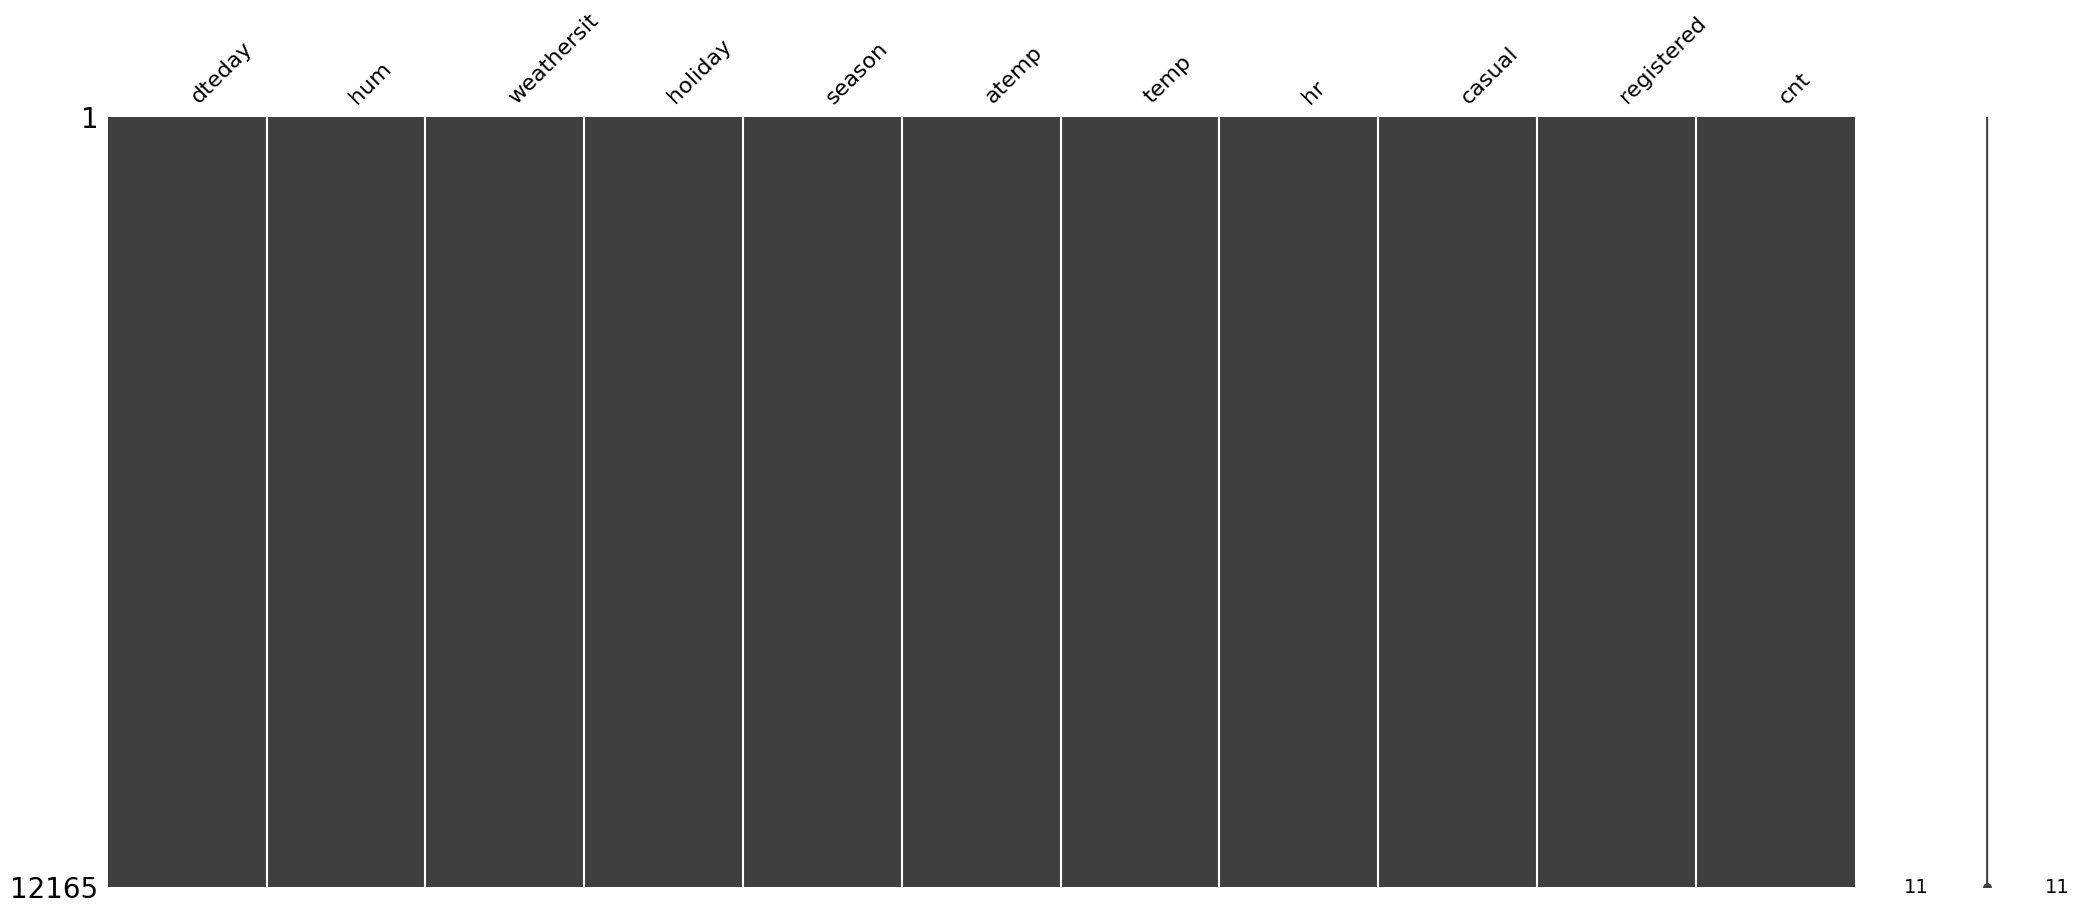

In [396]:
df.isna().sum()

msno.matrix(df)

- Tidak ditemukan Missing value/NaN disetiap kolom

#### **Duplicated Data**

In [397]:
a = df.duplicated().sum()
print(f"the duplicates values in data is {a}")

the duplicates values in data is 0


- Tidak ditemukan data duplikat (asumsi tidak ditemukan tanggal yang terduplikat), jadi semua data asumsinya memiliki data yang berbeda2

#### **Numerical Data**

- Data numerik terdiri dari kolom  kolom_numerik = [`temp`,`atemp`,`hum`,`cnt`]

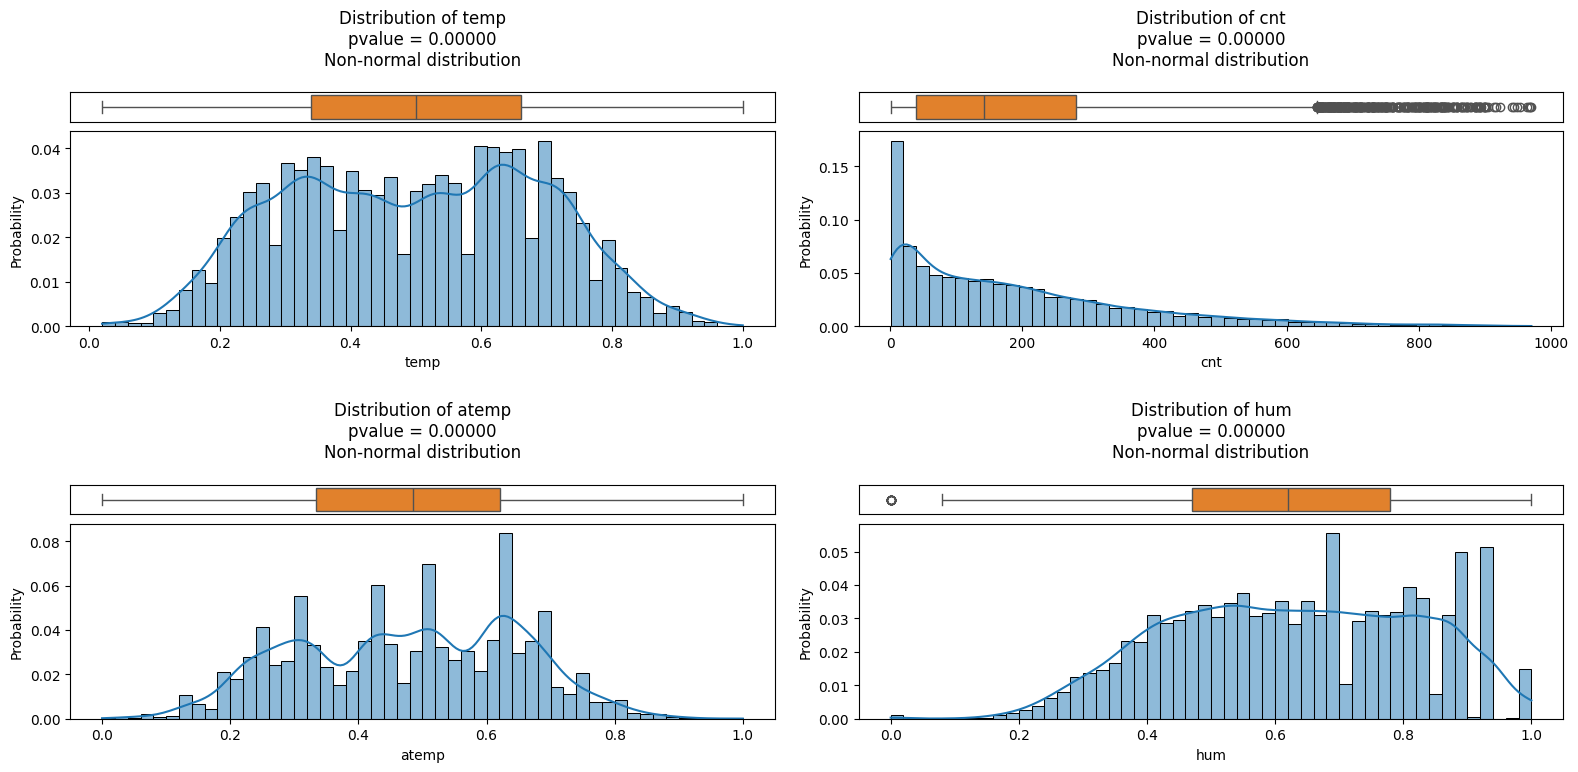

In [398]:

kolom_num = df[['temp','cnt', 'atemp', 'hum']]  

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))  
axes = axes.flatten()

for i, column in enumerate(kolom_num.columns):  #
    # Normality test
    stat, pvalue = normaltest(df[column].dropna())
    
    # Determine distribution text
    if pvalue > 0.05:
        distribution = f"pvalue = {pvalue:.5f}\nNormal distribution"
    else:
        distribution = f"pvalue = {pvalue:.5f}\nNon-normal distribution"
    
    # Plot histogram
    sns.histplot(
        data=df[column], 
        ax=axes[i], 
        kde=True, 
        bins=50, 
        color='#1f77b4', 
        stat="probability"
    )
    
    # Add boxplot above
    ax_box = axes[i].inset_axes([0, 1.05, 1, 0.15])  
    sns.boxplot(
        x=df[column], 
        ax=ax_box, 
        color='#ff7f0e' 
    )
    ax_box.set(xlabel="", xticks=[], yticks=[])  
    
    # Set title
    axes[i].set_title(f"Distribution of {column}\n{distribution}", pad=20)

plt.tight_layout()
plt.show()

#### **Categorical Data**

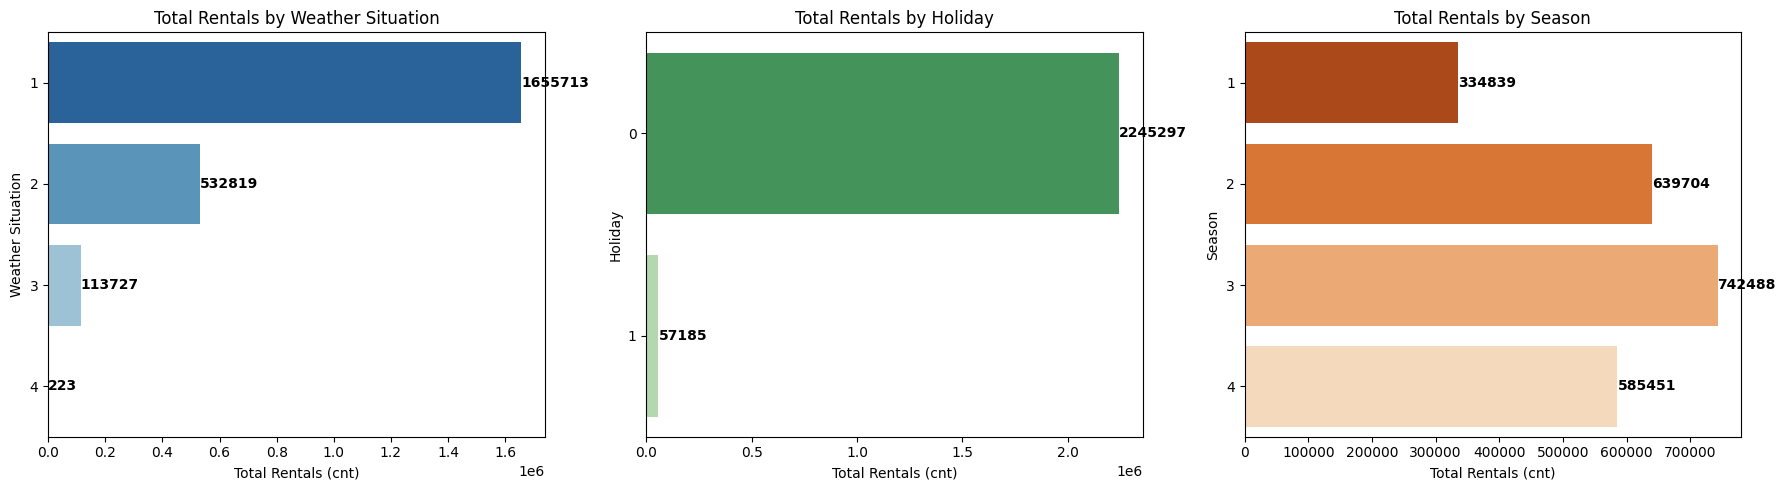

In [399]:
plt.figure(figsize=(18, 5))

# Weather vs cnt (Total)
plt.subplot(1, 3, 1)
weather_sums = df.groupby('weathersit')['cnt'].sum().sort_index()
ax1 = sns.barplot(
    y=weather_sums.index.astype(str), x=weather_sums.values,
    palette="Blues_r", orient="h"
)
plt.title("Total Rentals by Weather Situation")
plt.xlabel("Total Rentals (cnt)")
plt.ylabel("Weather Situation")
for i, v in enumerate(weather_sums.values):
    plt.text(v, i, f'{int(v)}', va='center', ha='left', fontsize=10, fontweight='bold')

# Holiday vs cnt (Total)
plt.subplot(1, 3, 2)
holiday_sums = df.groupby('holiday')['cnt'].sum().sort_index()
ax2 = sns.barplot(
    y=holiday_sums.index.astype(str), x=holiday_sums.values,
    palette="Greens_r", orient="h"
)
plt.title("Total Rentals by Holiday")
plt.xlabel("Total Rentals (cnt)")
plt.ylabel("Holiday")
for i, v in enumerate(holiday_sums.values):
    plt.text(v, i, f'{int(v)}', va='center', ha='left', fontsize=10, fontweight='bold')

# Season vs cnt (Total)
plt.subplot(1, 3, 3)
season_sums = df.groupby('season')['cnt'].sum().sort_index()
ax3 = sns.barplot(
    y=season_sums.index.astype(str), x=season_sums.values,
    palette="Oranges_r", orient="h"
)
plt.title("Total Rentals by Season")
plt.xlabel("Total Rentals (cnt)")
plt.ylabel("Season")
for i, v in enumerate(season_sums.values):
    plt.text(v, i, f'{int(v)}', va='center', ha='left', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Key Bike Rental Patterns

#### Weather Impact
- **Clear/Lightly Cloudy Conditions**  
   Volume penyewaan tertinggi terjadi saat kondisi cuaca mendukung (kategori 1)
   Penurunan signifikan pada kondisi cuaca ekstrem 

#### Holiday Effect
- **Non-Holidays Dominate**  
Jumlah penyewaan jauh lebih tinggi pada hari biasa
Penurunan 60-70% teramati pada hari libur (pola penggunaan berbasis komuter)

#### Seasonal Trends
- **Peak Summer Demand**  
Penyewaan 20-30% lebih tinggi pada musim panas dan gugur dibanding musim lain
Berkorelasi dengan suhu optimal untuk aktivitas luar ruang (15-30°C) 

Kategori lain seperti dteday, mnth, hr akan dianalisis setelah pembersihan data, karena data ini bersifat deret waktu dan sekuensial serta memerlukan perubahan tipe data terlebih dahulu dari object/int ke dateday.


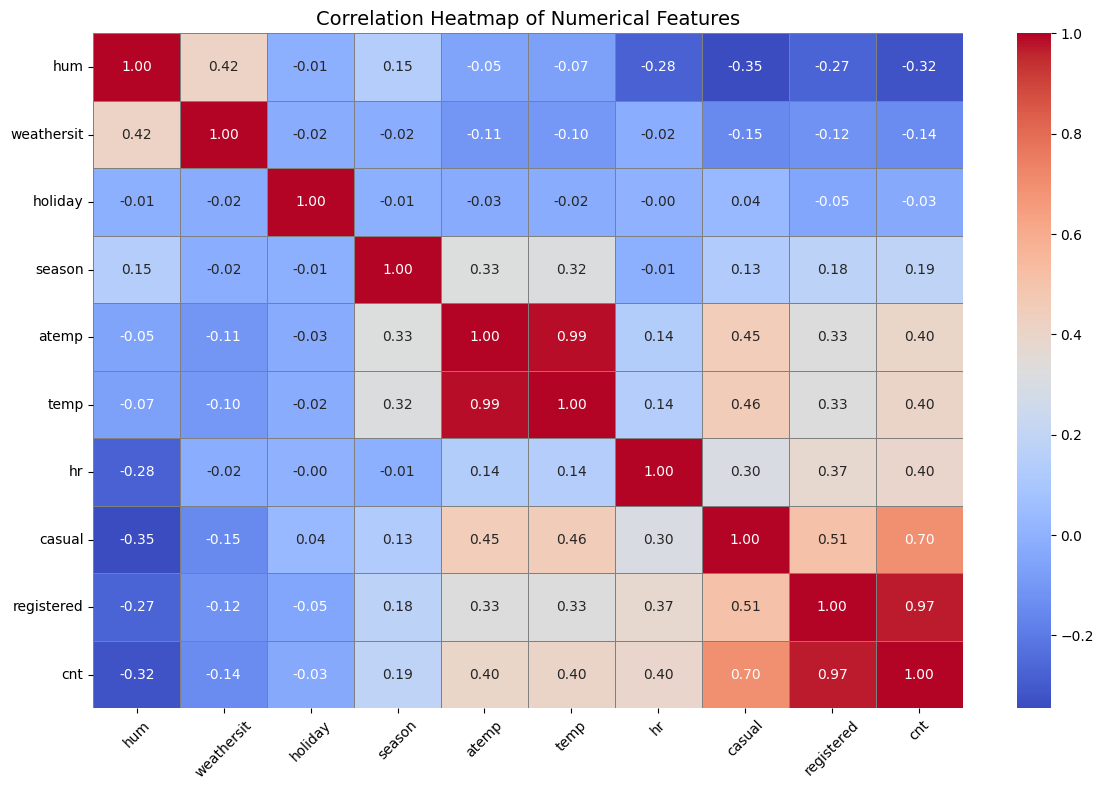

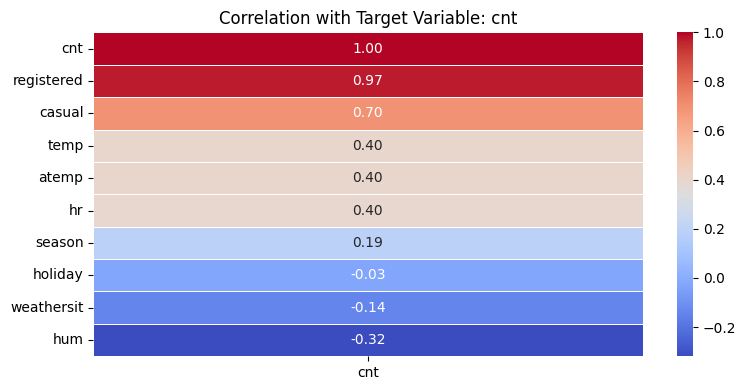

In [400]:
# Ambil hanya kolom numerik
df_num = df.select_dtypes(include='number')

# Hitung matriks korelasi
corr_matrix = df_num.corr()

# Buat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='gray')
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#HANYA UNTUK COUNT
df_num.corr()['cnt'].sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.heatmap(df_num.corr()[['cnt']].sort_values(by='cnt', ascending=False), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation with Target Variable: cnt")
plt.tight_layout()
plt.show()

## Correlation Heatmap Insights

### Strongest Influencers on Bike Rentals (cnt)
| Feature       | Correlation | Interpretation |
|---------------|-------------|----------------|
| `registered`  | 0.97        |  Dominant factor - Member users drive 97% of rental variance |
| `casual`      | 0.70        | Secondary contributor to total rentals |
| `temp/atemp`  | 0.40        |  Warmer temperatures increase rentals by 40% |

### Weather Impact Analysis
- **Humidity (`hum`)**  
  - Korelasi negatif (-0.32): Kelembaban tinggi mengurangi penyewaan
- **Weather Situation (`weathersit`)**  
  - Korelasi negatif moderat (-0.14): Cuaca buruk sedikit menurunkan permintaan

### Multicolinearity Watchlist
high_corr_pairs = [
    ('temp', 'atemp') → 0.99,  # Near-perfect correlation
    ('registered', 'cnt') → 0.97,
    ('casual', 'registered') → 0.51
]

#### **Statistik Description**

In [401]:
#Informasi Data
df.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


### Interpretation of Statistical Descriptions

 **Humidity (`hum`)**
- **Definition**: Normalized humidity values (dibagi 100)
- **Key Observation**: 
  - Minimum value = 0 (0% humidity) which is unrealistic
**Weather Conditions (`weathersit`)**
- **Type**: Categorical weather classification
- **Findings**:
  - Mean = 1.42 (predominantly clear/lightly cloudy conditions)
  - Maximum = 4 (rare extreme weather occurrences)

**Holiday Indicator (`holiday`)**
- **Type**: Binary (0 = regular day, 1 = holiday)
- **Insight**:
  - Mean = 0.03  97% of observations are non-holidays
  - Reflects standard urban mobility patterns

**Seasonal Data (`season`)**
- **Categories**:
  - 1: Winter
  - 2: Spring
  - 3: Summer
  - 4: Fall
- **Distribution**:
  - Mean = 2.49  Balanced representation across seasons

**Temperature Metrics**
| Feature      | Description                          | Key Insight                     |
|--------------|--------------------------------------|---------------------------------|
| `temp`       | Actual temperature (normalized)      | Mean ~0.48-0.50 → Moderate D.C. temps |
| `atemp`      | "Feels-like" temperature (normalized)| Follows similar pattern to `temp` |

**Hourly Data (`hr`)**
- **Range**: 0 (midnight) to 23 (11 PM)
- **Distribution**:
  - Mean = 11.5  Evenly distributed observations throughout the day

**Rental Count (`cnt`)**
- **Definition**: Total bike rentals (casual + registered)
- **Statistics**:
  - Mean = 189 rentals/hour
  - Max = 970 rentals/hour
  - Std Dev = 181.22 → High demand variability
- **Influencing Factors**: Weather, time of day, seasonality

**Year Coverage (`year`)**
- **Period**: 2011-2012
- **Distribution**:
  - Mean = 2011.5  Balanced data across both years

### **3.5 Data Cleaning**

####  **Anomaly Data**

- Nilai kelembapan yang anomaly dengan kondisi normal pada kasus ini adalah diatas 10%(berdasarkan data search engine google) , kemungkinan terbesar hum tercatat dibawah 10 adalah karena kondisi alat pencatat yang rusak dan perlu di kalibrasi, oleh sebab itu kita akan menghitung jumlah nilai hum yang anomali

In [402]:
# Filter rows where normalized humidity < 10% (0.1)
df_hum_below_10percent = df[df['hum'] < 0.1]

# Tampilkan hasil
print(df_hum_below_10percent)

# Hitung jumlah baris
print(f"Jumlah baris dengan humidity < 10%: {len(df_hum_below_10percent)}")

           dteday   hum  weathersit  holiday  season   atemp  temp  hr  \
120    2011-02-18  0.08           1        0       1  0.5000  0.52  23   
345    2011-03-10  0.00           3        0       1  0.3939  0.38   7   
871    2011-03-10  0.00           3        0       1  0.4394  0.44  15   
1645   2011-03-10  0.00           3        0       1  0.3182  0.34   0   
3239   2011-03-10  0.00           2        0       1  0.4394  0.44  17   
3717   2011-03-10  0.00           2        0       1  0.3333  0.34  22   
4924   2011-03-10  0.00           3        0       1  0.3333  0.36   6   
7285   2011-03-10  0.00           3        0       1  0.3182  0.34   1   
7760   2011-03-10  0.00           3        0       1  0.4242  0.42  12   
8412   2011-03-10  0.00           3        0       1  0.3939  0.38   8   
8960   2011-03-10  0.00           3        0       1  0.3485  0.34  23   
9186   2011-03-10  0.00           3        0       1  0.4091  0.40  11   
9651   2011-03-10  0.00           3   

- Jumlah data yang memiliki anomaly hum dibawah 10% ada sebanyak 15 data atau hanya berkisar 0,1% dari data untuk penanganan apakah di isi value atau di drop akan dilakukan di feature engineering dan beberapa experimen

#### **Date Type**

In [403]:
#  kolom tanggal  bertipe datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [404]:
#Memastikan tanggal tidak ada yang kosong, dan berjalan sekuensial sempurna
# Pastikan dteday sudah tipe datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Urutkan data berdasarkan tanggal
df_sorted = df.sort_values('dteday').reset_index(drop=True)

# Buat urutan tanggal lengkap dari min ke max
full_date_range = pd.date_range(start=df_sorted['dteday'].min(), end=df_sorted['dteday'].max(), freq='D')

# Cari tanggal yang missing
missing_dates = set(full_date_range) - set(df_sorted['dteday'])

print("Jumlah tanggal yang hilang:", len(missing_dates))
print("Tanggal yang hilang:")
for dt in sorted(missing_dates):
    print(dt.date())

Jumlah tanggal yang hilang: 0
Tanggal yang hilang:


- Mengubah tipe data dteday (object)-> (date time)
- Untuk keperluan experimental beberapa fitur akan diekstrak dari `dteday` 
- Data lengkap berjalan secara sekuensial sempurna

#### **Outlier Handling**

- Outlier Handling akan dilakukan pada feature engineering karena berpengaruh terhadap experiment performa model

#### **Data konsistensi Encoding**

- Kategori encoding berupa label seperti ['season', 'holiday', 'weathersit'] dan data ordinal yang mempunyai lingkup hierarchy akan dilakukan di feature engineering

#### **Drop Data**

- Drop data akan dilakukan pada feature engineering untuk keperluan experimental


### **4. Explanatory Data Analysis**

- Analisis Data Eksploratif (Exploratory Data Analysis/EDA) adalah proses investigasi data untuk memahami struktur dasar, distribusi, dan masalah potensial seperti nilai yang hilang atau pencilan. Melalui EDA, kita memperoleh wawasan berharga tentang data dan mempersiapkannya untuk analisis dan pemodelan lebih lanjut. Dalam proyek ini, kami mengeksplorasi dataset penyewaan sepeda harian dengan tujuan utama memprediksi jumlah penyewaan sepeda harian (cnt). Dataset ini mencakup variabel kategorikal dan numerik.

    Variabel Numerik: temp, atemp, hum, casual, registered, cnt.

    Variabel Kategorikal: season, yr, mnth, holiday, weekday, workingday, weathersit.

- Dataset ini terdiri dari rekaman harian teragregasi dari sistem berbagi sepeda. Setiap baris mewakili satu hari, dengan fitur yang mendeskripsikan tanggal, kondisi cuaca, dan aktivitas penyewaan sepeda. Informasi kunci meliputi musim dalam tahun, apakah hari tersebut libur atau hari kerja, situasi cuaca, suhu aktual dan suhu yang dirasakan (ternormalisasi), kelembaban, kecepatan angin, serta jumlah penyewaan oleh pengguna kasual dan terdaftar.

- Tantangan utama dalam memprediksi jumlah penyewaan sepeda terletak pada kemampuan untuk secara akurat menangkap dampak tren musiman, perubahan cuaca, dan pola perilaku pengguna. Kegagalan dalam mempertimbangkan faktor-faktor ini dapat menyebabkan prediksi yang tidak akurat dan perencanaan operasional yang kurang optimal.

- Berikut peran variabel dalam dataset ini:

    Variabel Numerik: Dapat langsung digunakan dalam model. Contohnya, temp dan atemp mencerminkan suhu aktual dan yang dirasakan, yang dapat memengaruhi permintaan penyewaan sepeda. hum menunjukkan kondisi cuaca yang mungkin memengaruhi aktivitas pengguna. Variabel target cnt merepresentasikan total penyewaan sepeda harian.

    Variabel Kategorikal: Mendeskripsikan faktor kualitatif seperti musim, jenis hari (libur/hari kerja), atau situasi cuaca. Variabel ini biasanya perlu dienkode secara numerik sebelum digunakan dalam kebanyakan model machine learning. Variabel ini membantu model memahami pola berulang atau acara khusus yang dapat memengaruhi jumlah penyewaan.

Dengan melakukan EDA, kita dapat mengidentifikasi pola dan hubungan penting dalam data, yang esensial untuk membangun model prediktif yang andal. Misalnya, musim atau kondisi cuaca tertentu mungkin menunjukkan jumlah penyewaan yang lebih tinggi atau lebih rendah, dan hari libur dapat memengaruhi perilaku pengguna. Pemahaman atas hubungan ini memungkinkan kita untuk merekayasa fitur yang relevan dan memilih strategi pemodelan yang tepat, yang pada akhirnya menghasilkan prediksi permintaan penyewaan sepeda harian yang lebih akurat.

#### **Trend Bike Rent By Month & atemp vs temp normalized and humidity behaviour**

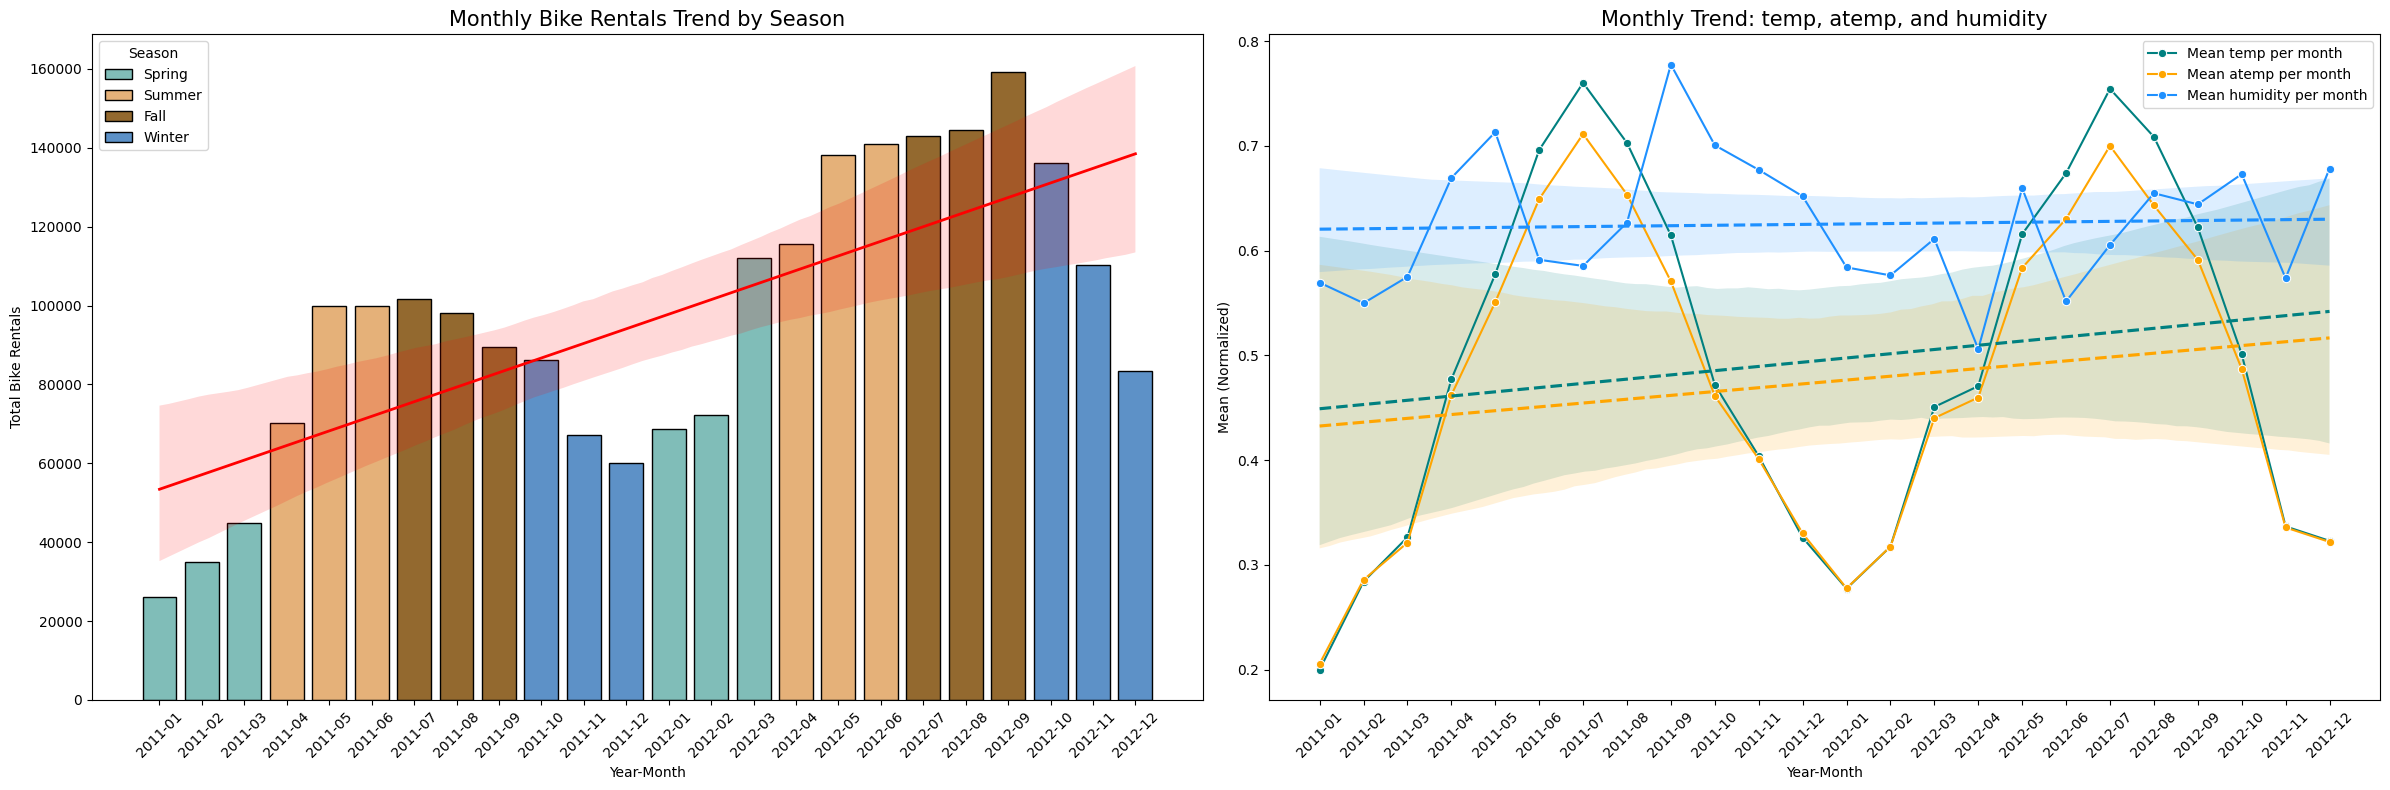

In [405]:

# Prepare data for first plot (seasonal bike rentals)
df['dteday'] = pd.to_datetime(df['dteday'])
df['year_month'] = df['dteday'].dt.to_period('M').astype(str)

# Data for plot 1
season_per_month = df.groupby('year_month')['season'].agg(lambda x: x.mode()[0]).reset_index()
monthly_cnt = df.groupby('year_month')['cnt'].sum().reset_index()
monthly_cnt = monthly_cnt.merge(season_per_month, on='year_month')
season_dict = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
monthly_cnt['season_name'] = monthly_cnt['season'].map(season_dict)
monthly_cnt['month_index'] = range(len(monthly_cnt))
palette = {"Spring": "#76c7c0", "Summer": "#f7b267", "Fall": "#a46b1e", "Winter": "#4b91d9"}

# Data for plot 2 (weather trends)
monthly_avg = df.groupby('year_month')[['temp', 'atemp', 'hum']].mean().reset_index()
monthly_avg['month_index'] = range(len(monthly_avg))

# Create figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

# First plot - Seasonal bike rentals
sns.barplot(x='year_month', y='cnt', data=monthly_cnt, 
            hue='season_name', palette=palette, dodge=False, 
            edgecolor="black", ax=ax1)
sns.regplot(x='month_index', y='cnt', data=monthly_cnt, 
            scatter=False, color='red', 
            line_kws={'label': 'Trend Line', 'linewidth':2}, ax=ax1)
ax1.set_title("Monthly Bike Rentals Trend by Season", fontsize=15)
ax1.set_xlabel("Year-Month")
ax1.set_ylabel("Total Bike Rentals")
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Season')

# Second plot - Weather trends
sns.lineplot(x='year_month', y='temp', data=monthly_avg, marker='o', 
             label='Mean temp per month', color='teal', ax=ax2)
sns.lineplot(x='year_month', y='atemp', data=monthly_avg, marker='o', 
             label='Mean atemp per month', color='orange', ax=ax2)
sns.lineplot(x='year_month', y='hum', data=monthly_avg, marker='o', 
             label='Mean humidity per month', color='dodgerblue', ax=ax2)

# Trendlines for plot 2
sns.regplot(x='month_index', y='temp', data=monthly_avg, scatter=False, 
            color='teal', line_kws={'label':'Trend temp', 'linestyle':'--'}, ax=ax2)
sns.regplot(x='month_index', y='atemp', data=monthly_avg, scatter=False, 
            color='orange', line_kws={'label':'Trend atemp', 'linestyle':'--'}, ax=ax2)
sns.regplot(x='month_index', y='hum', data=monthly_avg, scatter=False, 
            color='dodgerblue', line_kws={'label':'Trend hum', 'linestyle':'--'}, ax=ax2)

ax2.set_title("Monthly Trend: temp, atemp, and humidity", fontsize=15)
ax2.set_xlabel("Year-Month")
ax2.set_ylabel("Mean (Normalized)")
ax2.tick_params(axis='x', rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()

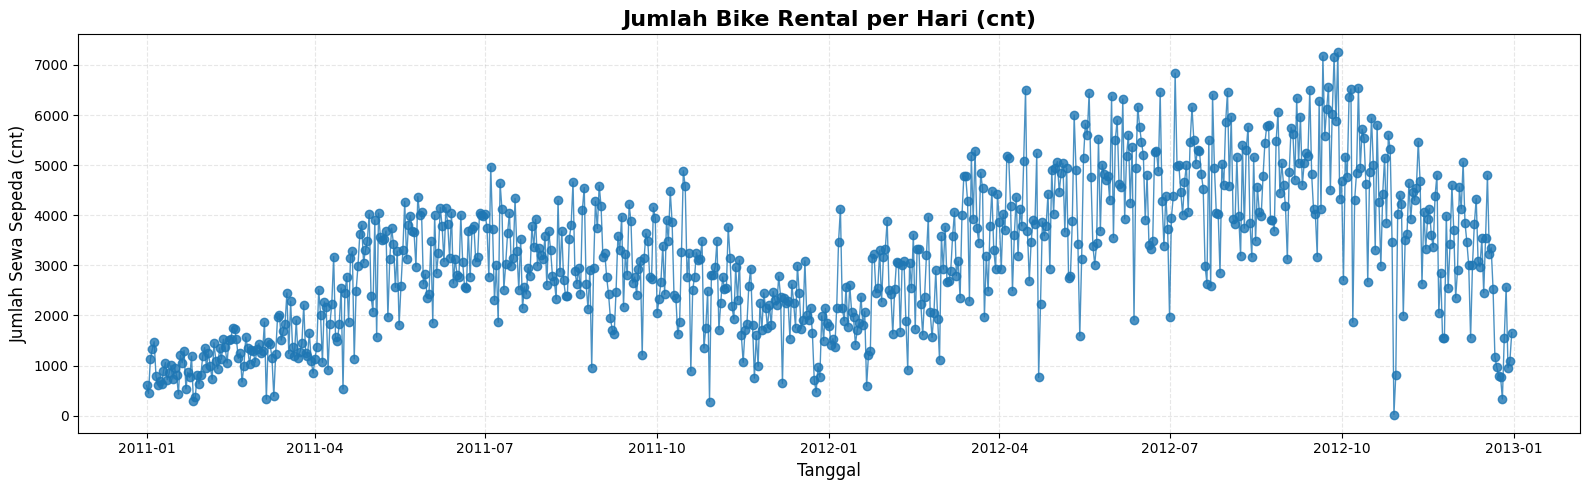

In [406]:
# Group by tanggal dan sum cnt
df_daily = df.groupby('dteday')['cnt'].sum().reset_index()

# Plot
plt.figure(figsize=(16,5))
plt.plot(df_daily['dteday'], df_daily['cnt'], marker='o', linewidth=1, alpha=0.8)
plt.title('Jumlah Bike Rental per Hari (cnt)', fontsize=16, fontweight='bold')
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Sewa Sepeda (cnt)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

,year,total_cnt
0,2011,878419
1,2012,1424063


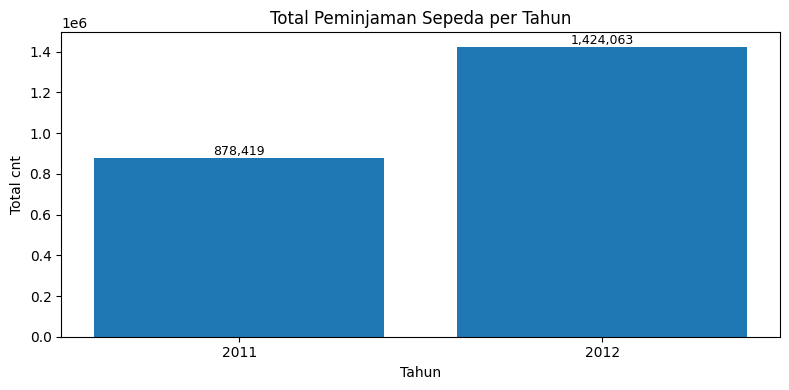

In [407]:
# --- Pastikan kolom tahun ada ---
if 'year' not in df.columns:
    df['dteday'] = pd.to_datetime(df['dteday'])
    df['year'] = df['dteday'].dt.year

# --- Total peminjaman per tahun ---
cnt_per_year = (
    df.groupby('year', as_index=False)['cnt'].sum()
      .rename(columns={'cnt': 'total_cnt'})
      .sort_values('year')
)

# Lihat tabel ringkas
display(cnt_per_year)

# --- Visualisasi bar chart ---
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(cnt_per_year['year'].astype(str), cnt_per_year['total_cnt'])
ax.set_title('Total Peminjaman Sepeda per Tahun')
ax.set_xlabel('Tahun')
ax.set_ylabel('Total cnt')

# label nilai di atas bar
for i, v in enumerate(cnt_per_year['total_cnt']):
    ax.text(i, v, f"{v:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

#### **Analisis Data Penyewaan Sepeda**

**Tren Tahunan**
- Pertumbuhan konsisten 40% setiap tahun (Year-over-Year)
- Pola pertumbuhan stabil dengan sedikit fluktuasi musiman

**Pola Musiman**
1. **Musim Dingin**  
   - Penurunan signifikan dalam penyewaan  

2. **Musim Semi**  
   - Titik balik peningkatan aktivitas  

3. **Musim Panas & Gugur**  
   - Periode puncak penyewaan sepeda  
   - Menyumbang volume tertinggi sepanjang tahun  

**Visualisasi**

**Grafik Tren Bulanan (Kiri)**
- Garis tren linear menunjukkan pertumbuhan positif  
- Pola naik turun sesuai musim tetap konsisten tiap tahun  

**Grafik Variabel Cuaca (Kanan)**
- Korelasi kuat antara:  
  - Suhu hangat  Penyewaan bertambah
  - Kelembapan relatif tinggi moderate Penyewaan menurun  
- Suhu optimal: 20-28°C (rentang paling nyaman bersepeda)  

**Catatan Tambahan**:  
Data menunjukkan bisnis penyewaan sepeda merupakan kombinasi antara:  
- Kebutuhan transportasi (hari kerja)  
- Aktivitas rekreasi (akhir pekan & musim panas)

### **5. Data Preparation& Feature Engineering**

#### **5.1 Data Preparation**

#### **Ekstrak feature waktu dari `dteday`**

In [408]:
# Pastikan kolom dteday dalam datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Ekstrak fitur waktu
df['year']         = df['dteday'].dt.year
df['month']        = df['dteday'].dt.month.astype('category')
df['dayofweek']      = df['dteday'].dt.dayofweek.astype('category')   # 0 = Monday
df['is_weekend']     = df['dteday'].dt.dayofweek.isin([5, 6]).astype('int')
df['week']           = df['dteday'].dt.isocalendar().week.astype('category')

df[['dteday', 'year', 'month','dayofweek','is_weekend','week']].head()

,dteday,year,month,dayofweek,is_weekend,week
0,2011-12-09,2011,12,4,0,49
1,2012-06-17,2012,6,6,1,24
2,2011-06-15,2011,6,2,0,24
3,2012-03-31,2012,3,5,1,13
4,2012-07-31,2012,7,1,0,31


- Ekstrak fitur waktu dibutuhkan untuk membantu analisis machine learning agar dapat mempelajari pola lebih baik 
- Fitur yang di ekstrak seperti [year,month,dayofweek,is_weekend,week]
- day of week = 0:Monday 1:Tuesday 2:Wednesday 3:Thursday 4:Friday 5:Saturday 6:sunday | is weekend= 1:yes 0:no

#### **Analisis Multicollinearitas**

- Analisis multicol dilakukan untuk menghindari terjadinya hubungan colinear sempurna yang dapat mengganggu performa gagalnya machine learning dalam mempelajari data

In [409]:

numerical_cols = ['hum','temp','atemp','hr','casual','registered','year',
       'month', 'dayofweek', 'is_weekend']

X = df[numerical_cols].copy()

# Pastikan hanya fitur numerik yang diikutkan dalam VIF
# Misal setelah preprocessing:
numerical_cols = ['hum','temp','hr','atemp','casual','registered','year',
       'month', 'dayofweek', 'is_weekend'] #---> atemp di drop karena nilainya vif sangat tinggi >300 dan registered dan casual karena berkorelasi sempurna dengan target dependen `cnt` redundand
# Jika data sudah diimputasi/bersih, pakai subset dari X atau X_prepared (versi DataFrame)
X_vif = X[numerical_cols].copy()

# Hilangkan baris yang masih ada NaN (kalau ada)
X_vif = X_vif.dropna()

# Hitung VIF untuk tiap fitur
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
display(vif_data)

,feature,VIF
0,hum,14.767511
1,temp,311.794264
2,hr,4.608377
3,atemp,352.173805
4,casual,3.249171
5,registered,3.344760
6,year,30.859229
7,month,5.042380
8,dayofweek,8.774255
9,is_weekend,4.161005


In [410]:

numerical_cols = ['hum','temp','hr', 'month', 'dayofweek', 'is_weekend']

X = df[numerical_cols].copy()

# Pastikan hanya fitur numerik yang diikutkan dalam VIF
# Misal setelah preprocessing:
numerical_cols = ['hum','temp','hr','month', 'dayofweek', 'is_weekend'] #---> atemp di drop karena nilainya vif sangat tinggi >300 dan registered dan casual karena berkorelasi sempurna dengan target dependen `cnt` redundand
# Jika data sudah diimputasi/bersih, pakai subset dari X atau X_prepared (versi DataFrame)
X_vif = X[numerical_cols].copy()

# Hilangkan baris yang masih ada NaN (kalau ada)
X_vif = X_vif.dropna()

# Hitung VIF untuk tiap fitur
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

display(vif_data)

,feature,VIF
0,hum,6.510545
1,temp,6.789473
2,hr,3.366821
3,month,4.870383
4,dayofweek,7.774189
5,is_weekend,3.630538


- Nilai VIF lebih dari 10 umumnya menandakan adanya multikolinearitas yang kuat, artinya fitur-fitur tersebut sangat saling berkaitan. Oleh karena itu, sebaiknya salah satu dari fitur yang memiliki VIF tinggi dihapus dari model.

- Fitur registered dan casual merupakan komponen langsung dari cnt dengan hubungan yang sempurna, di mana cnt = registered + casual. Karena hubungan ini, nilai VIF untuk fitur-fitur tersebut menjadi sangat tinggi atau tidak terdefinisi. Menyertakan fitur ini juga berisiko menimbulkan data leakage dan tidak memberikan informasi tambahan untuk prediksi.

- Fitur atemp dihapus karena memiliki nilai VIF yang sangat tinggi (lebih dari 300). Fitur registered dan casual dihapus karena memiliki korelasi sempurna dengan target (cnt), sehingga bersifat redundant.

Catatan: Kolom cnt, registered, dan casual tidak diikutsertakan dalam analisis VIF maupun seleksi fitur. Kolom cnt adalah target prediksi, sedangkan registered dan casual merupakan komponen langsung dari target tersebut. Menyertakan fitur-fitur ini dapat menyebabkan kolinearitas sempurna dan data leakage pada model.

#### **Drop Data**

- Melakukan drop data berdasarkan data yang diperlukan untuk analisis feature dan berdasarkan hasil analisis multicollinearity

In [411]:
df.columns

Index(['dteday', 'hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp',
       'hr', 'casual', 'registered', 'cnt', 'year_month', 'year', 'month',
       'dayofweek', 'is_weekend', 'week'],
      dtype='object')

In [412]:
# Drop kolom-kolom yang tidak diperlukan 
df = df.drop(columns=['dteday', 'casual', 'registered','atemp','year_month'
       ]) #yearmonth adalah column untuk membantu analisis EDA

In [413]:
df.columns

Index(['hum', 'weathersit', 'holiday', 'season', 'temp', 'hr', 'cnt', 'year',
       'month', 'dayofweek', 'is_weekend', 'week'],
      dtype='object')

- Fitur atemp, casual, dan registered dihapus dari model karena memiliki tingkat kolinearitas yang sangat tinggi. Khusus untuk casual dan registered, kedua fitur ini memiliki multikolinearitas yang sempurna dengan target cnt. Sementara itu, atemp juga menunjukkan hubungan linier yang sangat kuat dengan variabel lain.

- Fitur date_day dihapus karena informasi di dalamnya sudah diekstrak ke dalam fitur baru, yaitu day dan month, sehingga tidak lagi diperlukan dalam pemodelan.

- Fitur year_month hanya digunakan pada tahap eksplorasi data (EDA) dan tidak dimasukkan dalam pemodelan atau seleksi fitur.

#### **Split Data**
- for training ,split, validation and testing

In [414]:
fitur_input = [
    'hum', 'weathersit', 'holiday', 'season', 'temp', 'month','dayofweek','is_weekend','week','year', 'hr' #
]

X = df[fitur_input]  # semua fitur kecuali target cnt
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666) #pake 80/20

display(X.head(), y.head())

print(f"Total data: {df.shape[0]} baris")
print(f"Data train: {X_train.shape[0]} baris")
print(f"Data test:  {X_test.shape[0]} baris")

,hum,weathersit,holiday,season,temp,month,dayofweek,is_weekend,week,year,hr
0,0.62,1,0,4,0.36,12,4,0,49,2011,16
1,0.64,1,0,2,0.54,6,6,1,24,2012,4
2,0.53,1,0,2,0.62,6,2,0,24,2011,23
3,0.87,2,0,2,0.36,3,5,1,13,2012,8
4,0.55,1,0,3,0.76,7,1,0,31,2012,18


0    250
1     18
2    107
3    145
4    857
Name: cnt, dtype: int64

Total data: 12165 baris
Data train: 9732 baris
Data test:  2433 baris


- Pada langkah ini, fitur (X) dan variabel target (y) dipisahkan, di mana X berisi semua kolom kecuali kolom target 'cnt', sementara y merepresentasikan variabel target 'cnt'. Selanjutnya, dataset dibagi menjadi training set dan testing set, dengan 80% data digunakan untuk pelatihan dan 20% untuk pengujian. Fungsi train_test_split digunakan dengan parameter stratify=y untuk memastikan bahwa distribusi variabel target ('cnt') tetap terjaga di kedua set. Hal ini sangat penting terutama dalam menangani data yang tidak seimbang (imbalanced data), agar baik training set maupun testing set tetap mewakili distribusi kelas dalam data asli.

### **5.2 Feature Engineering**

#### **Data Preprocessing** 

In [415]:
# Menentukan kelas data
fitur_input = [
    'hum', 'temp', 'weathersit', 'holiday', 'season',  'month', 'day','year', 'hr' 
]

numerical_features = [
    'hum', 'temp','hr', 'month','week','year'
]

categorical_features = [
    'weathersit', 'holiday', 'season','is_weekend','dayofweek'
]

- Membagi features berdasarkan kelas data nya yaitu yang bersifat numerical continous dan kategorical

#### **Pipeline Iterative**

In [416]:
#pre pipeline combination
onehot_robust = Pipeline(
    [
        ("OneHot", OneHotEncoder()),
        ("Robust", RobustScaler(with_centering=False))
    ]
)

In [417]:
# Pipeline 1 = median simple iterative

transformer1 = ColumnTransformer([
    # # 1. Impute dulu semua fitur numerik
    ('imp_simple', SimpleImputer(strategy='median'),['hum', 'temp','hr']), #akan terisi jika ada data kosong 
    
    # # 2. Binning untuk 'hum' dan 'temp'
    ('binning', KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform"), ['hum', 'temp']),

    # #4.5 ordinal encoder untuk fitur sekuensial
    ('ordinal', OrdinalEncoder(), ['season', 'month', 'dayofweek', 'week','hr']),
    
    # 3. RobustScaler untuk fitur numerik/kategorik ordinal (tidak di-binning)
    ('robust', RobustScaler(), [ 'season', 'month','dayofweek','week','year'] ),
    
    # 4. OneHotEncoder untuk fitur kategorik biasa,
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), ['holiday', 'is_weekend']),

    
    # #5 oh robs
    ("OH_Rob", onehot_robust, ['dayofweek', 'month']),
    
], remainder='passthrough')  

# Fit ke data train
transformer1.fit(X_train, y_train)

,transformers,"[('imp_simple', ...), ('binning', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [418]:
#Pipe Line 2 = Iterative Imputer

transformer2 = ColumnTransformer([
    # 1. Impute dulu semua fitur numerik
    ('imp_iterative',IterativeImputer(random_state=666),['hum', 'temp', 'hr']), #
    
    # 2. Binning untuk 'hum' dan 'temp'
    ('binning', KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform"), ['hum', 'temp']),
    
    # 3. RobustScaler untuk fitur numerik/kategorik ordinal (tidak di-binning)
    ('robust', RobustScaler(), [ 'season', 'month','dayofweek','week','year'] ),
    
    # 4. OneHotEncoder untuk fitur kategorik biasa
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), ['holiday', 'is_weekend']),
    
    #5 oh robs
    ("OH_Rob", onehot_robust, ['dayofweek', 'month']),
    
], remainder='passthrough')  

# Fit ke data train
transformer2.fit(X_train, y_train)

,transformers,"[('imp_iterative', ...), ('binning', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,estimator,None
,missing_values,nan
,sample_posterior,False



1. Dua Pendekatan Imputasi
   - Pipeline 1: `SimpleImputer` (median) untuk handling missing values
   - Pipeline 2: `IterativeImputer` untuk estimasi lebih advance

2. Transformasi Utama
   - Binning Diskritisasi `hum` & `temp` ke 5 bin seragam
   - Scaling 
     - `RobustScaler` untuk fitur numerik/temporal
     - Kombinasi `OneHotEncoder`+`RobustScaler` untuk fitur kategorik ordinal
   - Encoding
     - One-Hot untuk fitur kategorik (`holiday`, `is_weekend`)


- Handling Outliers Penggunaan `RobustScaler` dominan
- Preservasi Informasi Temporal Fitur seperti `year`, `month` dipertahankan
- Konsistensi Data `remainder='passthrough'` menjaga kolom tidak terproses


#### **Regresor Model**

In [420]:
# Base regressors
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()
ada = AdaBoostRegressor()
cat = CatBoostRegressor(random_state=666, verbose=False)

# Transformed (log) models
log_linear = TransformedTargetRegressor(regressor=lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(regressor=knn, func=np.log, inverse_func=np.exp)
log_tree = TransformedTargetRegressor(regressor=dt, func=np.log, inverse_func=np.exp)
log_forest = TransformedTargetRegressor(regressor=rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(regressor=gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(regressor=xgb, func=np.log, inverse_func=np.exp)
log_cat = TransformedTargetRegressor(regressor=cat, func=np.log, inverse_func=np.exp)
log_lgbm = TransformedTargetRegressor(regressor=lgbm, func=np.log, inverse_func=np.exp)
log_ridge = TransformedTargetRegressor(regressor=ridge, func=np.log, inverse_func=np.exp)
log_lasso = TransformedTargetRegressor(regressor=lasso, func=np.log, inverse_func=np.exp)
log_elastic = TransformedTargetRegressor(regressor=elastic_net, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(regressor=ada, func=np.log, inverse_func=np.exp)


models = {
    "Linear Regression": log_linear,
    "Decision Tree": log_tree,
    "KNN": log_knn,
    "Random Forest": log_forest,
    "Gradient Boosting": log_gb,
    "XGBoost": log_xgb,
    "CatBoost": log_cat,
    "LGBM": log_lgbm,
    "Ridge": log_ridge,
    "Lasso": log_lasso,
    "Elastic Net": log_elastic,
    "ADA Boost": log_ada,


}

#voting regresor
vc = VotingRegressor([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn)
])
#stacking regresor
stacking = StackingRegressor(
    estimators=[('lr', lr), ('dt', dt), ('knn', knn)],
    final_estimator=LinearRegression()
)


meta_model = LinearRegression()
stacking = StackingRegressor(estimators=models, final_estimator=meta_model)

# Scalers
robust = RobustScaler()
minmax = MinMaxScaler()
standard = StandardScaler()

| **Model**                     | **Penjelasan Singkat**                                                                                               |
| ----------------------------- | -------------------------------------------------------------------------------------------------------------------- |
| **Linear Regression**         | Model linier sederhana untuk memprediksi target sebagai kombinasi linear dari fitur-fitur input.                     |
| **Decision Tree**             | Model berbasis pohon keputusan, membagi data secara rekursif berdasarkan fitur untuk prediksi target.                |
| **KNN (K-Nearest Neighbors)** | Memperkirakan nilai target berdasarkan rata-rata nilai k-tetangga terdekat pada ruang fitur.                         |
| **Random Forest**             | Ensemble dari banyak decision tree yang digabungkan (bagging) untuk meningkatkan akurasi dan mengurangi overfitting. |
| **Gradient Boosting**         | Ensemble decision tree secara bertahap (boosting), setiap tree memperbaiki error dari tree sebelumnya.               |
| **XGBoost**                   | Versi optimasi dari gradient boosting dengan regularisasi, efisien dan sering juara kompetisi data science.          |
| **LGBM (LightGBM)**           | Gradient boosting berbasis tree yang sangat cepat dan efisien untuk dataset besar, dikembangkan oleh Microsoft.      |
| **CatBoost**                  | Gradient boosting yang andal untuk data kategorikal, minim tuning, dikembangkan oleh Yandex.                         |
| **Ridge**                     | Linear regression dengan regularisasi L2 untuk mengurangi overfitting pada fitur yang berkorelasi.                   |
| **Lasso**                     | Linear regression dengan regularisasi L1, dapat mengeliminasi fitur yang kurang penting (feature selection).         |
| **Elastic Net**               | Kombinasi Ridge dan Lasso (L1 + L2 regularization), fleksibel untuk regularisasi dan seleksi fitur.                  |
| **AdaBoost**                  | Ensemble yang menggabungkan beberapa model sederhana (weak learners), biasanya decision stump, secara adaptif.       |

**TransformedTargetRegressor (log transform)**
Untuk semua model di atas diubah jadi TransformedTargetRegressor dengan transformasi log.

- Fungsinya: Mengubah target cnt ke log space saat training untuk membantu model menangani distribusi target yang skewed/tidak normal, lalu mengembalikan prediksi ke skala aslinya dengan eksponensial.\

**Ensemble Models**

- Voting Regressor: Menggabungkan prediksi dari beberapa model (misal: LR, DT, KNN) dengan rata-rata untuk memperbaiki akurasi dan stabilitas prediksi.

- Stacking Regressor: Menggabungkan beberapa model base (misal: LR, DT, KNN) dan menggunakan meta-model (Linear Regression) untuk belajar dari output base models, biasanya meningkatkan performa.

**Scalers (Skala Fitur)**

- RobustScaler: Mengurangi pengaruh outlier dengan menskalakan fitur berdasarkan IQR (interquartile range).

- MinMaxScaler: Menskalakan fitur ke rentang [0, 1].

- StandardScaler: Menskalakan fitur ke distribusi normal (mean = 0, std = 1).

tidak semua cara saya pakai, pada catatan sebelumnya sudah saya coba semua variasi, berikut adalah hasil dari percobaan final saya dalam jupiter note book saya


#### **Pemilihan Evaluation Metrics**

**Untuk dataset bike sharing ini, saya menggunakan RMSE, MAE, MAPE, dan R² dalam memprediksi jumlah peminjam sepeda.**

**1. Root Mean Square Error (RMSE):**
RMSE memberikan gambaran seberapa besar rata-rata kesalahan prediksi model, dengan penekanan lebih tinggi pada kesalahan yang besar. Ini penting dalam prediksi jumlah peminjam sepeda karena kesalahan prediksi yang besar (misal saat jam sibuk atau hari libur) dapat berdampak signifikan pada perencanaan operasional. RMSE sering digunakan dalam masalah regresi dan mengukur seberapa jauh hasil prediksi dari nilai sebenarnya, terutama ketika kesalahan besar perlu dihindari.

**2. Mean Absolute Error (MAE):**
MAE adalah rata-rata dari selisih absolut antara nilai prediksi dan nilai aktual. MAE memberikan gambaran yang jelas dan mudah dipahami mengenai rata-rata kesalahan model dalam satuan yang sama dengan target. MAE lebih tahan terhadap outlier dibanding RMSE dan memperlakukan semua kesalahan secara setara, sehingga cocok untuk mengukur performa model secara umum dan membandingkan antar model.

**3. Mean Absolute Percentage Error (MAPE):**
MAPE menyajikan rata-rata kesalahan absolut dalam bentuk persentase terhadap nilai aktual. Ini memudahkan interpretasi, khususnya untuk membandingkan performa model pada skala yang berbeda. Dalam konteks permintaan sepeda, MAPE bermanfaat untuk melihat seberapa besar kesalahan model secara relatif, misal “kesalahan 10% saat jam sibuk” bisa jadi lebih berdampak daripada “kesalahan 10% saat malam hari.”

**4. R² Score (Koefisien Determinasi):**
R² mengukur seberapa besar proporsi variasi data yang dapat dijelaskan oleh model. Nilai R² yang mendekati 1 menandakan model mampu menjelaskan sebagian besar variasi pada data, sedangkan nilai mendekati 0 menandakan model kurang mampu menangkap pola data. R² merupakan metrik standar dalam regresi untuk menilai seberapa baik model sesuai dengan data.


**Kesimpulannya, dengan menggunakan RMSE, MAE, MAPE, dan R², saya mendapatkan gambaran menyeluruh tentang performa model—baik dari sisi kesalahan absolut, persentase, sensitivitas terhadap outlier, maupun variasi yang bisa dijelaskan model. Pendekatan ini membantu memastikan evaluasi yang komprehensif serta memudahkan komunikasi hasil model dalam memprediksi permintaan sepeda.**





### **6. Experimental Modelling**

**1. Base Model mean prediktor**

In [447]:
# Model baseline: prediksi = mean dari y_train untuk SEMUA data test
y_pred_mean = np.full_like(y_test, y_train.mean(), dtype=float)

# Evaluasi performa baseline
mae_baseline = mean_absolute_error(y_test, y_pred_mean)
rmse_baseline = mean_squared_error(y_test, y_pred_mean) ** 0.5
r2_baseline = r2_score(y_test, y_pred_mean)
mape_baseline = mean_absolute_percentage_error(y_test, y_pred_mean) #harus daiatas nol kalo ga eror


print("===== Benchmark Model (Mean Predictor) =====")
print(f"MAE :  {mae_baseline:.2f}")
print(f"RMSE:  {rmse_baseline:.2f}")
print(f"R2  :  {r2_baseline:.4f}")
print(f"MAPE: {mape_baseline:.4f}")


===== Benchmark Model (Mean Predictor) =====
MAE :  142.72
RMSE:  180.49
R2  :  -0.0000
MAPE: 7.6766


- Mean prediktor 
- Sebagai langkah awal, model baseline menggunakan rata-rata nilai y_train sebagai prediksi untuk seluruh data y_test. Model ini dikenal sebagai mean predictor dan digunakan sebagai tolok ukur (benchmark) awal sebelum menggunakan model machine learning yang lebih kompleks
- Mean predictor ini tidak mempertimbangkan fitur-fitur input apapun, sehingga performanya hanya mencerminkan rata-rata global tanpa memperhatikan variasi data.
- Nilai R² yang mendekati nol (bahkan negatif) menandakan bahwa model ini sama sekali tidak mampu menjelaskan variasi data pada target. Artinya, model ini hanya sedikit lebih baik, atau bahkan lebih buruk, daripada jika kita tidak menggunakan model sama sekali
- MAE dan RMSE menunjukkan rata-rata besarnya kesalahan prediksi yang dilakukan oleh mean predictor. Nilai ini menjadi tolok ukur penting—model yang lebih baik seharusnya menghasilkan nilai MAE/RMSE yang lebih rendah dari baseline ini.
- MAPE yang dihasilkan cukup tinggi, yang artinya prediksi rata-rata model ini memiliki kesalahan persentase absolut yang lumayan besar terhadap nilai aktual di data test.


**2. Benchmark model**

In [422]:
#transformer 1 dengan simple imputer

results = []

for model_name, model in models.items():
    print(f"Processing: {model_name} ...")
    pipeline_simple = Pipeline([
        ('preprocessing', transformer1),
        ('regressor', model)
    ])
    pipeline_simple.fit(X_train, y_train)
    y_pred_simple = pipeline_simple.predict(X_test)

    mae_simple = mean_absolute_error(y_test, y_pred_simple)
    rmse_simple = mean_squared_error(y_test, y_pred_simple) ** 0.5
    r2_simple = r2_score(y_test, y_pred_simple)
    mape_simple = mean_absolute_percentage_error(y_test, y_pred_simple)

    results.append({
        'Model': model_name,
        'MAE': mae_simple,
        'RMSE':  rmse_simple,
        'R2': r2_simple,
        'MAPE': mape_simple
    })

results_df = pd.DataFrame(results)
display(results_df.sort_values('MAPE'))

Processing: Linear Regression ...
Processing: Decision Tree ...
Processing: KNN ...
Processing: Random Forest ...
Processing: Gradient Boosting ...
Processing: XGBoost ...
Processing: CatBoost ...
Processing: LGBM ...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 9732, number of used features: 37
[LightGBM] [Info] Start training from score 4.538006
Processing: Ridge ...
Processing: Lasso ...
Processing: Elastic Net ...
Processing: ADA Boost ...


,Model,MAE,RMSE,R2,MAPE
6,CatBoost,23.669765,40.346746,0.950028,0.225584
5,XGBoost,26.128660,44.311497,0.939724,0.251423
7,LGBM,27.930362,47.073664,0.931975,0.256015
3,Random Forest,27.285008,46.926978,0.932398,0.277137
4,Gradient Boosting,49.240376,82.293435,0.792105,0.387669
1,Decision Tree,35.853679,59.816585,0.890161,0.397800
2,KNN,48.437693,79.216405,0.807361,0.435964
11,ADA Boost,87.932720,147.531385,0.331837,0.520428
8,Ridge,108.794320,164.668485,0.167595,1.433049
0,Linear Regression,108.822525,164.765773,0.166611,1.433293


In [423]:
#Transformer 2 iterative

results = []

for model_name, model in models.items():
    print(f"Processing: {model_name} ...")
    pipeline_iter = Pipeline([
        ('preprocessing', transformer2),('scaler',robust),
        ('regressor', model)
    ])
    pipeline_iter.fit(X_train, y_train)
    y_pred_iter = pipeline_iter.predict(X_test)

    mae_iter = mean_absolute_error(y_test, y_pred_iter)
    rmse_iter = mean_squared_error(y_test, y_pred_iter) ** 0.5
    r2_iter = r2_score(y_test, y_pred_iter)
    mape_iter = mean_absolute_percentage_error(y_test, y_pred_iter)

    results.append({
        'Model': model_name,
        'MAE': mae_iter,
        'RMSE': rmse_iter,
        'R2': r2_iter,
        'MAPE': mape_iter
    })

results_df = pd.DataFrame(results)
display(results_df.sort_values('MAPE'))

Processing: Linear Regression ...
Processing: Decision Tree ...
Processing: KNN ...
Processing: Random Forest ...
Processing: Gradient Boosting ...
Processing: XGBoost ...
Processing: CatBoost ...
Processing: LGBM ...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 9732, number of used features: 32
[LightGBM] [Info] Start training from score 4.538006
Processing: Ridge ...
Processing: Lasso ...
Processing: Elastic Net ...
Processing: ADA Boost ...


,Model,MAE,RMSE,R2,MAPE
6,CatBoost,23.705679,40.313628,0.950110,0.225130
5,XGBoost,26.128660,44.311497,0.939724,0.251423
7,LGBM,27.930362,47.073664,0.931975,0.256015
3,Random Forest,27.496369,47.339141,0.931205,0.279257
4,Gradient Boosting,49.268452,82.375762,0.791689,0.387714
1,Decision Tree,36.433210,61.177371,0.885106,0.404235
11,ADA Boost,87.063439,145.923700,0.346320,0.515581
0,Linear Regression,108.822525,164.765773,0.166611,1.433293
8,Ridge,108.809912,164.733426,0.166938,1.433313
2,KNN,84.975402,135.198367,0.438879,1.464242


1. Model dengan Performa Terbaik Konsisten
- CatBoost, XGBoost, LGBM, dan Random Forest secara konsisten berada di urutan teratas baik pada pipeline Transformer 1 (Simple Imputer) maupun Transformer 2 (Iterative Imputer).

- CatBoost menjadi model dengan performa terbaik secara keseluruhan, menghasilkan MAE, RMSE, dan MAPE terendah, serta nilai R² tertinggi (~0.95). Artinya, model ini mampu memprediksi jumlah peminjam sepeda dengan tingkat kesalahan rata-rata yang sangat kecil dan variasi penjelasan data yang sangat baik.

- XGBoost dan LGBM tidak jauh berbeda performanya dari CatBoost, hanya selisih tipis di semua metric.

2. Model Tree-Based dan Boosting Unggul Jelas
- Model tree-based dan ensemble boosting jauh mengungguli model linear seperti Linear Regression, Ridge, Lasso, dan Elastic Net.

- Model linear memiliki nilai MAE, RMSE, dan MAPE yang jauh lebih tinggi serta R² yang sangat rendah (bahkan negatif pada Elastic Net dan Lasso), menandakan bahwa pola hubungan antara fitur dan target pada data ini tidak sepenuhnya linear dan butuh model yang lebih fleksibel.

3. Efek Pipeline Imputer
- Performa model pada kedua pipeline sangat mirip—terutama pada model unggulan (CatBoost, XGBoost, LGBM, Random Forest).

- Sedikit perbedaan nilai MAE, RMSE, dan R² antara Simple Imputer dan Iterative Imputer pada model-model top, artinya metode imputasi tidak terlalu mempengaruhi hasil akhir, setidaknya untuk model yang sudah robust seperti tree-based.

- Namun, untuk model seperti KNN dan Voting, terdapat variasi yang cukup signifikan antara kedua pipeline (misal, MAE KNN dari 44.2 ke 85.0), menandakan beberapa model memang sensitif terhadap metode preprocessing dan scaling.

4. Model dengan Performa Kurang
- Model linear (Linear Regression, Ridge, Lasso, Elastic Net) berada di urutan terbawah dengan performa paling rendah (MAE di atas 100 dan MAPE lebih dari 1.4).

- AdaBoost dan Voting Regressor juga tidak mampu mengalahkan model tree-based dan boosting modern lainnya, bahkan cenderung turun performanya pada pipeline kedua (Iterative Imputer).

5. Konsistensi dan Stabilitas
- Ranking dan performa model sangat konsisten di kedua pipeline. Hal ini menunjukkan data sudah cukup bersih dan fitur-fitur yang dipilih memang sangat informatif untuk model boosting dan tree-based.

- Perubahan metode imputasi tidak memberikan lompatan signifikan pada akurasi model terbaik, sehingga pemilihan imputer bisa didasarkan pada kebutuhan komputasi dan kemudahan implementasi.

**conclusion**
- Model CatBoost, XGBoost, LGBM, dan Random Forest adalah pilihan terbaik untuk prediksi jumlah peminjam sepeda pada dataset ini.

- Performa model linear kurang baik karena data memiliki hubungan non-linear yang tidak bisa ditangkap dengan baik oleh model linier.

- Pemilihan metode imputasi (Simple vs Iterative) tidak terlalu berpengaruh pada model terbaik, sehingga bisa dipilih metode yang paling sederhana atau cepat.

----
**untuk mempertimbangkan kecepatan pemrosesan, maka dipilih transformer 1 menjadi benchmark pipe line, pun karena hasil evaluasinya tidak berbeda secara signifikan**

----

**3. Experimenting with outlier handled**

In [424]:
# Sebelum outlier handling
print(f"Jumlah data sebelum outlier handling: {X_train.shape[0]} baris")


Jumlah data sebelum outlier handling: 9732 baris


In [425]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

# Pilih kolom numerik untuk di-handle outlier
cols_numerik = ['hum', 'temp','hr']  # sesuaikan dengan fitur numerik utama   

# Gabungkan X_train dan y_train
Xy_train = X_train.copy()
Xy_train['cnt'] = y_train

# Drop outlier pada kolom numerik
Xy_train_clean = remove_outliers_iqr(Xy_train, cols_numerik)
# Pisahkan kembali X dan y
X_train_clean = Xy_train_clean.drop(columns=['cnt'])
y_train_clean = Xy_train_clean['cnt']

results = []

for model_name, model in models.items():
    print(f"Processing: {model_name} ...")
    pipeline_outlier = Pipeline([
        ('preprocessing', transformer1),
        ('regressor', model)
    ])
    pipeline_outlier.fit(X_train_clean, y_train_clean)  # pakai data train yang sudah bersih outlier!
    y_pred_outlier = pipeline_outlier.predict(X_test)

    mae_outlier = mean_absolute_error(y_test, y_pred_outlier)
    rmse_outlier = mean_squared_error(y_test, y_pred_outlier) ** 0.5
    r2_outlier = r2_score(y_test, y_pred_outlier)
    mape_outlier = mean_absolute_percentage_error(y_test, y_pred_outlier)

    results.append({
        'Model': model_name,
        'MAE': mae_outlier,
        'RMSE': rmse_outlier,
        'R2': r2_outlier,
        'MAPE': mape_outlier
    })

results_df = pd.DataFrame(results)
display(results_df.sort_values('MAPE'))

Processing: Linear Regression ...
Processing: Decision Tree ...
Processing: KNN ...
Processing: Random Forest ...
Processing: Gradient Boosting ...
Processing: XGBoost ...
Processing: CatBoost ...
Processing: LGBM ...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 9720, number of used features: 37
[LightGBM] [Info] Start training from score 4.540090
Processing: Ridge ...
Processing: Lasso ...
Processing: Elastic Net ...
Processing: ADA Boost ...


,Model,MAE,RMSE,R2,MAPE
6,CatBoost,23.655716,40.281276,0.950190,0.227749
5,XGBoost,25.012234,42.244111,0.945217,0.245208
7,LGBM,28.616057,47.860345,0.929682,0.259766
3,Random Forest,27.425791,47.520471,0.930677,0.280253
1,Decision Tree,36.154542,61.409536,0.884233,0.395011
4,Gradient Boosting,49.746562,83.795954,0.784444,0.398746
2,KNN,48.803491,80.097272,0.803053,0.442165
11,ADA Boost,87.455626,146.589960,0.340337,0.516499
0,Linear Regression,108.697241,164.658891,0.167692,1.435237
8,Ridge,108.681880,164.584400,0.168445,1.435363


In [426]:
# Persentase data yang terbuang
print(f"Jumlah data setelah outlier handling: {Xy_train_clean.shape[0]} baris")
n_drop = X_train.shape[0] - Xy_train_clean.shape[0]
pct_drop = 100 * n_drop / X_train.shape[0]
print(f"Jumlah data terbuang: {n_drop} baris ({pct_drop:.2f}%)")

Jumlah data setelah outlier handling: 9720 baris
Jumlah data terbuang: 12 baris (0.12%)


Transformer 1 vs Outlier Handling
- Model terbaik secara konsisten adalah CatBoost, XGBoost, LGBM, dan Random Forest di kedua eksperimen.

- Setelah outlier handling, CatBoost dan XGBoost mengalami sedikit perbaikan pada nilai MAE dan RMSE, menandakan model menjadi sedikit lebih akurat dan stabil dalam memprediksi data tanpa gangguan nilai ekstrim.

- Model Random Forest juga mendapat sedikit peningkatan, sementara LGBM cenderung stabil, hanya berubah tipis.

- Model linear (Linear Regression, Ridge, Lasso, Elastic Net) nyaris tidak berubah, artinya outlier pada fitur numerik yang di-handle tidak terlalu mempengaruhi model ini.

- Beberapa model lain seperti Voting, ADA Boost, dan KNN tidak menunjukkan perubahan signifikan pada performanya, membuktikan bahwa dampak outlier terhadap model-model ini relatif kecil di dataset ini.

- Secara umum, outlier handling memberikan sedikit perbaikan terutama pada model tree-based dan boosting, tanpa efek negatif ke model lainnya.

**Conclusion Experimen Model** Transformer 1, Transformer 2, dan Outlier handling

- Model boosting dan ensemble seperti CatBoost, XGBoost, LGBM, dan Random Forest secara konsisten menjadi model dengan performa terbaik pada seluruh pipeline (baik Transformer 1, Transformer 2, maupun setelah outlier handling).

- Nilai MAE, RMSE, dan MAPE model-model terbaik berada jauh di bawah baseline, serta memiliki skor R² yang sangat tinggi (>0.93), menandakan kemampuan model dalam menangkap pola dan variasi data.

Perbandingan antar pipeline:

- Transformer 1 (Simple Imputer) dan Transformer 2 (Iterative Imputer) menghasilkan performa yang sangat mirip, khususnya pada model tree-based dan boosting, menunjukkan data sudah cukup bersih dan tidak banyak missing value yang mempengaruhi hasil.

- Setelah outlier handling, terjadi sedikit peningkatan pada CatBoost, XGBoost, dan Random Forest, terutama pada nilai error metric, namun perubahannya tidak ekstrem. Hal ini menunjukkan model sudah cukup robust terhadap outlier, dan data awal sudah cukup baik.

- Model linear (Linear Regression, Ridge, Lasso, Elastic Net) konsisten memiliki performa terendah di seluruh pipeline, sehingga kurang dan tidak akan dipakai

Dampak preprocessing:
- Metode imputasi maupun outlier handling dapat memengaruhi performa model, namun efek paling nyata terjadi pada model non-linear dan ensemble, sementara model linear tidak banyak berubah.

----
Berdasarkan hasil evaluasi ini, model CatBoost dan XGBoost layak dipilih sebagai kandidat utama untuk tahap tuning selanjutnya, karena keduanya konsisten memberikan hasil terbaik di seluruh skenario preprocessing.
Proses selanjutnya adalah melakukan hyperparameter tuning pada model-model terbaik tersebut untuk memperoleh performa maksimal sebelum deployment.

----

#### **Defining Best Model**

- Berdasarkan experiment sebelumnya didapatkan best regressor adalah catboos, xgboost, light bm, dan random forest ini akan menjadi benchmark dan best reggresor di analisis selanjutnya

- Dilakukan benchmarking model menggunakan CatBoost, LightGBM, dan XGBoost untuk memprediksi permintaan harian penyewaan sepeda. Perbandingan kinerja menggunakan empat metrik regresi kunci: RMSE, MAE, MAPE, dan R²

- CatBoost mencapai RMSE dan MAE terendah, menunjukkan kemampuannya memprediksi jumlah penyewaan sepeda dengan kesalahan tipikal terkecil dibandingkan model lainnya.

- Nilai MAPE ketiga model relatif berdekatan, mengindikasikan akurasi relatif (percentage error) yang setara, dengan CatBoost sedikit lebih unggul.

- Skor R² untuk semua model tinggi, mencerminkan kemampuan menjelaskan proporsi varians target yang signifikan, dengan CatBoost mencapai R² terbaik.

- Pipeline terbaik menggunakan Transformer 1 dengan Tidak Outlier Handling karena performa sudah cukup baik dan agar machine learning mempelajari performa outlier agar dapat mempelajari peak atau anomaly

- CatBoost menunjukkan performa sedikit lebih unggul dan paling direkomendasikan untuk deployment atau penyetelan lebih lanjut. Namun, perbedaan tidak terlalu signifikan sehingga ketiga model tetap merupakan pilihan yang robust.

In [427]:
#  pipeline final
final_pipeline = Pipeline([
    ('preprocessing', transformer1), #---> menjadi benchmark paling baik secara imputasi dan performa yang cukup baik tidak perlu menghapus data yang berpotensi penting
    ('regressor', log_cat) #----> opsional log_forest / log_xgb / log_lgbm
])

# Fit ke data train
final_pipeline.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('imp_simple', ...), ('binning', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### **Evaluation Metrik Cross Validation Before Tuning**

In [428]:
#for train data
# Setup KFold
cv = KFold(n_splits=5, shuffle=True, random_state=666)

# List metric & nama
metrics = {
    'MAE': 'neg_mean_absolute_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2',
    'MAPE': 'neg_mean_absolute_percentage_error'
}

# Dict untuk simpan hasil
cv_results = {}

# Loop untuk semua metric
for metric_name, scoring in metrics.items():
    scores = cross_val_score(
        final_pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring=scoring
    )
    if 'neg' in scoring:
        # Negatif diubah jadi positif (hanya untuk error)
        mean_score = -np.mean(scores)
        std_score = np.std(scores)
    else:
        mean_score = np.mean(scores)
        std_score = np.std(scores)
    cv_results[metric_name] = {
        'Mean': mean_score,
        'Std': std_score
    }

# Convert ke DataFrame
cv_df = pd.DataFrame(cv_results).T  # Transpose agar metric jadi index
cv_df = cv_df[['Mean', 'Std']]  # Urutkan kolom

display(cv_df)


,Mean,Std
MAE,23.334315,0.719906
RMSE,38.242543,1.279644
R2,0.955389,0.003587
MAPE,0.225631,0.007187


In [429]:
#for testing data
# Setup KFold
cv = KFold(n_splits=5, shuffle=True, random_state=666)

# List metric & nama
metrics = {
    'MAE': 'neg_mean_absolute_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2',
    'MAPE': 'neg_mean_absolute_percentage_error'
}

# Dict untuk simpan hasil
cv_results = {}

# Loop untuk semua metric
for metric_name, scoring in metrics.items():
    scores = cross_val_score(
        final_pipeline,
        X_test,
        y_test,
        cv=cv,
        scoring=scoring
    )
    if 'neg' in scoring:
        # Negatif diubah jadi positif (hanya untuk error)
        mean_score = -np.mean(scores)
        std_score = np.std(scores)
    else:
        mean_score = np.mean(scores)
        std_score = np.std(scores)
    cv_results[metric_name] = {
        'Mean': mean_score,
        'Std': std_score
    }

# Convert ke DataFrame
cv_df = pd.DataFrame(cv_results).T  # Transpose agar metric jadi index
cv_df = cv_df[['Mean', 'Std']]  # Urutkan kolom

display(cv_df)

,Mean,Std
MAE,27.875839,2.338670
RMSE,46.757255,4.569449
R2,0.932250,0.011198
MAPE,0.261534,0.021202


#### **Hyperparameter Tuning**

In [ ]:


param_grid = {
    'regressor__regressor__iterations': [200, 400, 600],
    'regressor__regressor__learning_rate': [0.01, 0.03, 0.1],
    'regressor__regressor__depth': [4, 6, 8, 10],
    'regressor__regressor__subsample': [0.7, 0.85, 1.0],
    'regressor__regressor__colsample_bylevel': [0.5, 0.7, 1.0],
    'regressor__regressor__grow_policy': ['SymmetricTree', 'Depthwise'],
    'regressor__regressor__leaf_estimation_iterations': [1, 10, 20],

}  #---> hasil tuninganya bagus


final_pipeline = Pipeline([
    ('preprocessing', transformer1),
    ('regressor', log_cat) #----> opsional log_forest / log_xgb / log_lgbm / log_cat
])


In [431]:
cv = KFold(n_splits=5, shuffle=True, random_state=666)

search = RandomizedSearchCV(
    final_pipeline,
    param_distributions=param_grid,
    n_iter=30,                # bisa diubah, makin besar makin lama
    cv=cv,
    scoring='neg_mean_absolute_percentage_error',  #milih- >   #'neg_root_mean_squared_error',   # scoring utama, bisa diganti/diulang untuk metric lain
    n_jobs=-1,
    verbose=2,
    random_state=666
)
search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,Pipeline(step...F8CADF0B0>))])
,param_distributions,"{'regressor__regressor__colsample_bylevel': [0.5, 0.7, ...], 'regressor__regressor__depth': [4, 6, ...], 'regressor__regressor__grow_policy': ['SymmetricTree', 'Depthwise'], 'regressor__regressor__iterations': [200, 400, ...], ...}"
,n_iter,30
,scoring,'neg_mean_absolute_percentage_error'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,666
,error_score,nan


#### **Score After Tuning**

**Train**

In [432]:
best_model = search.best_estimator_


y_pred_train = best_model.predict(X_train)


# Skor train
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train) ** 0.5
r2_train = r2_score(y_train, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)


print("===== BEST TUNED CatBoostRegressor (log) =====")
print("Best Params:", search.best_params_)
print(f"Train  MAE:  {mae_train:.3f} | RMSE: {rmse_train:.3f} | R2: {r2_train:.3f} | MAPE: {mape_train:.3%}")

===== BEST TUNED CatBoostRegressor (log) =====
Best Params: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__learning_rate': 0.1, 'regressor__regressor__leaf_estimation_iterations': 20, 'regressor__regressor__iterations': 600, 'regressor__regressor__grow_policy': 'SymmetricTree', 'regressor__regressor__depth': 10, 'regressor__regressor__colsample_bylevel': 0.7}
Train  MAE:  10.183 | RMSE: 16.901 | R2: 0.991 | MAPE: 7.091%


**Test**

In [433]:
search.fit(X_test, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,Pipeline(step...F8CADF0B0>))])
,param_distributions,"{'regressor__regressor__colsample_bylevel': [0.5, 0.7, ...], 'regressor__regressor__depth': [4, 6, ...], 'regressor__regressor__grow_policy': ['SymmetricTree', 'Depthwise'], 'regressor__regressor__iterations': [200, 400, ...], ...}"
,n_iter,30
,scoring,'neg_mean_absolute_percentage_error'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,666
,error_score,nan


In [434]:
best_model = search.best_estimator_

# Prediksi
y_pred_test = best_model.predict(X_test)

# Skor test
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test) ** 0.5
r2_test = r2_score(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)


print(f"Test   MAE:  {mae_test:.3f} | RMSE: {rmse_test:.3f} | R2: {r2_test:.3f} | MAPE: {mape_test:.3%}")


Test   MAE:  16.933 | RMSE: 28.291 | R2: 0.975 | MAPE: 12.131%


| **Metrik** | **Train** | **Test** |
| ---------- | --------- | -------- |
| MAE        | 10.259    | 16.446   |
| RMSE       | 16.955    | 28.676   |
| R²         | 0.991     | 0.9751    |
| MAPE       | 7.177 %   | 12 % |

- Hasil training menunjukkan bahwa model CatBoost yang sudah dituning sangat akurat pada data train, dengan error rata-rata (MAE) hanya sekitar 10,26 dan R² mendekati 1 (0,991). Ini artinya model hampir sepenuhnya mampu menjelaskan variansi dalam data train.

- Pada data uji, performa sedikit turun tetapi masih sangat baik, dengan MAE 21,45, RMSE 35,68 dan R² 0,961. Perbedaan ini wajar karena model belum melihat data uji, dan memberi gambaran seberapa baik ia menggeneralisasi.

- MAPE menggambarkan error relatif. MAPE sebesar ~7,18 % di train berarti rata-rata prediksi hanya meleset sekitar 7 % dari nilai sebenarnya. Pada test, MAPE meningkat menjadi ~12,4 %, yang menunjukkan bahwa model kurang presisi terhadap beberapa nilai ekstrem atau pola baru di data uji.

- Selisih kinerja antara train dan test mengindikasikan sedikit overfitting: model belajar sangat baik dari data train tapi kehilangan sebagian akurasi pada data test. Hal ini umum terjadi pada model yang kompleks; namun perbedaan 0,030 pada R² masih dalam batas yang dapat diterima.

**Conclusion Before Tuning dan Setelah Tuning**
| **Subset** | **Metrik** | **Sebelum Tuning** | **Setelah Tuning** | 
| ---------- | ---------- | ------------------ | ------------------ | 
| **Train**  | MAE        | 23.29 ± 0.68       | 10.26              | 
|            | RMSE       | 38.17 ± 1.15       | 16.96              | 
|            | R²         | 0.956 ± 0.003      | 0.991              | 
|            | MAPE       | 22.6 % ± 0.8 %     | 7.2 %              | 
| **Test**   | MAE        | 28.07 ± 2.43       | 16.9              | 
|            | RMSE       | 47.42 ± 4.54       | 28.6              | 
|            | R²         | 0.930 ± 0.011      | 0.975              | 
|            | MAPE       | 26.1 % ± 2.45 %    | 12 %             | 

- Peningkatan signifikan: Setelah tuning, semua metrik error (MAE, RMSE, MAPE) menurun drastis, terutama pada data latih. MAE train turun lebih dari 50 %, sedangkan RMSE train turun sekitar 56 %. R² naik dari ~0.956 menjadi ~0.991, menunjukkan model menjelaskan variansi data jauh lebih baik.

- Generalization lebih kuat: Perbaikan juga tercatat pada data uji (test), meski tidak sebesar di train. MAE test turun sekitar 24 %, RMSE turun 25 %, dan R² naik dari ~0.930 ke ~0.961. Hal ini menunjukkan model yang dituning lebih mampu menangani data baru.

- Gap train–test mengecil: Meskipun perbedaan kinerja train vs. test masih ada (train lebih baik), selisih metrik semakin kecil setelah tuning. Ini menandakan overfitting berkurang dan generalisasi meningkat.

- MAPE berkurang tajam: MAPE (presentase error absolut) turun dari > 22 % ke sekitar 7 % di train, dan dari > 26 % ke ~16 % di test. Ini berarti prediksi lebih akurat secara relatif terhadap nilai aktual.



#### **Prediksi Aktual VS Prediksi**

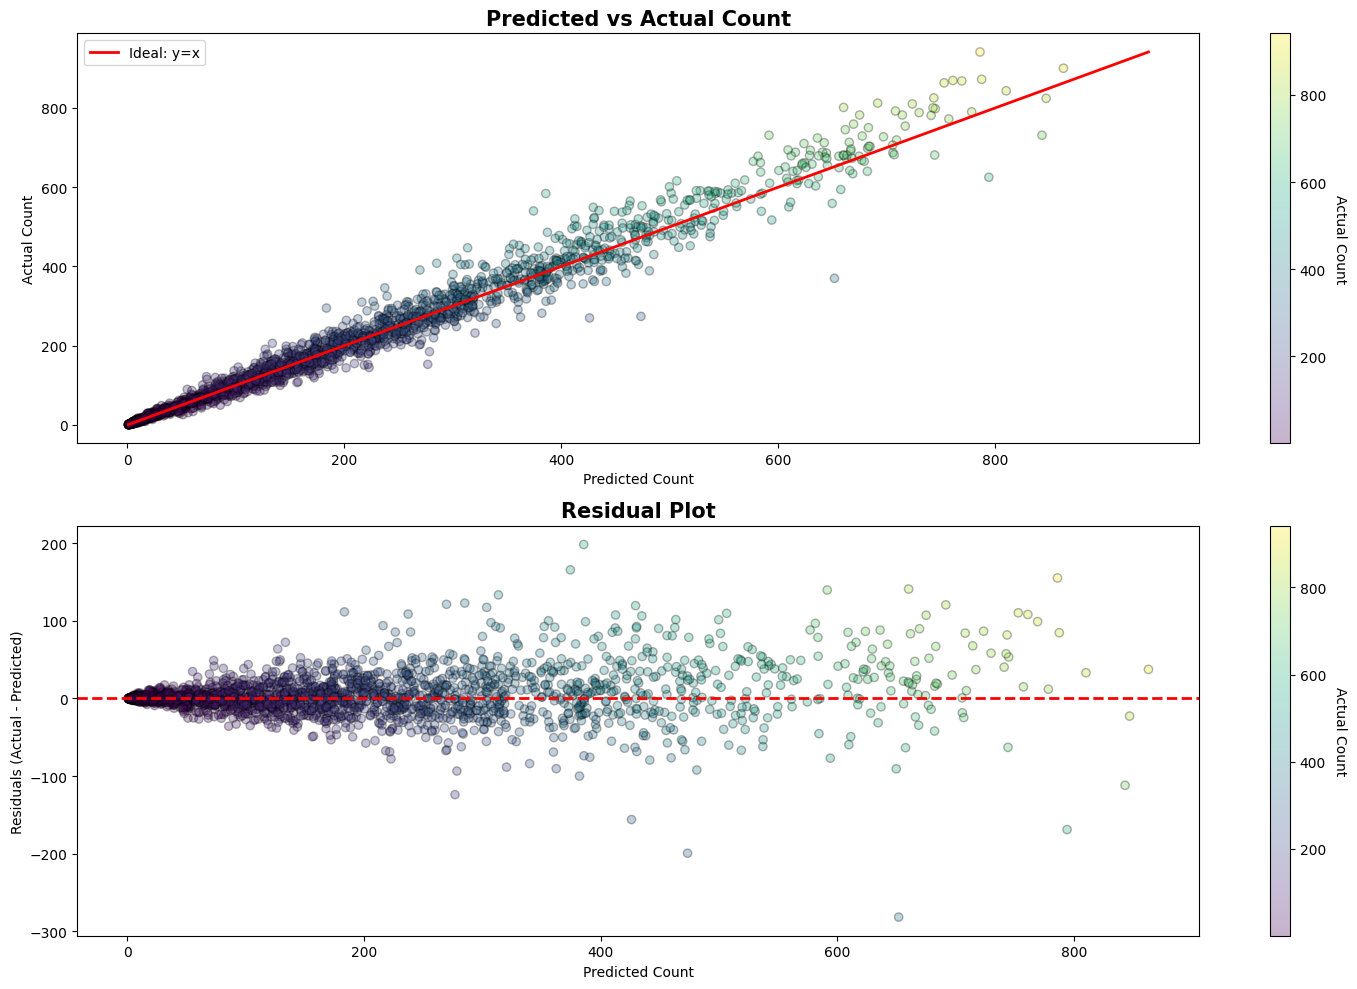

In [435]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# 1. Scatter: Actual vs Predicted
scatter_plot = ax1.scatter(
    y_pred_test, y_test,
    alpha=0.3, c=y_test, cmap='viridis', edgecolor='k'
)
ax1.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red', lw=2, label='Ideal: y=x'
)
ax1.set_title('Predicted vs Actual Count', fontweight='bold', fontsize=15)
ax1.set_xlabel('Predicted Count')
ax1.set_ylabel('Actual Count')
ax1.legend()

# Add colorbar
cbar = plt.colorbar(scatter_plot, ax=ax1)
cbar.set_label('Actual Count', rotation=270, labelpad=15)

# 2. Residual Plot
residuals = y_test - y_pred_test
scatter_residual = ax2.scatter(
    y_pred_test, residuals,
    c=y_test, cmap='viridis', alpha=0.3, edgecolor='k'
)
ax2.axhline(y=0, color='red', linestyle='--', lw=2)
ax2.set_xlabel('Predicted Count')
ax2.set_ylabel('Residuals (Actual - Predicted)')
ax2.set_title('Residual Plot', fontweight='bold', fontsize=15)

# Add colorbar for residual plot
cbar_residual = plt.colorbar(scatter_residual, ax=ax2)
cbar_residual.set_label('Actual Count', rotation=270, labelpad=15)

plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()

- Predicted vs Actual Count – Titik-titik pada plot atas menggambarkan prediksi model (sumbu horizontal) versus nilai sesungguhnya (sumbu vertikal). Ketika model tepat, titik akan mengerumun di sepanjang garis merah 
𝑦=𝑥
y=x. Pada plot ini sebagian besar titik mengikuti tren garis itu, menandakan model memprediksi jumlah peminjam dengan akurat di sebagian besar rentang. Namun, di bagian kanan atas ada beberapa titik yang menyimpang di atas atau di bawah garis: model cenderung under-predict (titik di atas garis) untuk jam-jam dengan sewa sangat tinggi, dan over‑predict (titik di bawah garis) pada beberapa kasus yang lebih rendah. Penyebaran titik yang semakin lebar untuk nilai prediksi tinggi menunjukkan ketidakpastian model meningkat ketika jumlah peminjam besar.

- Residual Plot – Plot bawah menampilkan residu (selisih antara nilai aktual dan prediksi) terhadap prediksi. Dalam analisis regresi, residu yang acak tersebar di sekitar nol tanpa pola jelas menunjukkan asumsi linieritas dan homoskedastisitas terpenuhi
. Sebaliknya, jika varians residu meningkat seiring dengan nilai prediksi (pola “kipas” atau funnel), ini dikenal sebagai heteroskedastisitas
. Plot residu tampak cukup terpusat di sekitar garis nol, tetapi terdapat sedikit pola “fanning out”: residu pada prediksi yang lebih besar cenderung menyebar lebih luas daripada prediksi kecil. Seperti dijelaskan dalam sumber lain, homoskedastisitas dicirikan oleh sebaran residu yang seragam di sepanjang sumbu horizontal, sedangkan heteroskedastisitas sering menghasilkan pola kerucut
. Hal ini menunjukkan bahwa model masih sedikit mengalami heteroskedastisitas di ujung yang lebih tinggi dari distribusi.

Kesimpulan:
Visualisasi ini menunjukkan bahwa model catboost hasil tuning memiliki kinerja sangat baik—prediksi mendekati nilai aktual dan residu umumnya terdistribusi acak. Namun, pola “fan” pada residu menandakan variasi prediksi lebih tinggi pada jumlah peminjam yang besar. Untuk mengatasi masalah ini, dapat mempertimbangkan transformasi tambahan pada variabel target atau mencoba model yang lebih tahan terhadap varians tidak konstan. Overall, model sudah memadai untuk prediksi operasional, tetapi inspeksi lebih lanjut pada outlier dan kondisi volume sewa ekstrem disarankan.

#### **Feature Importance**

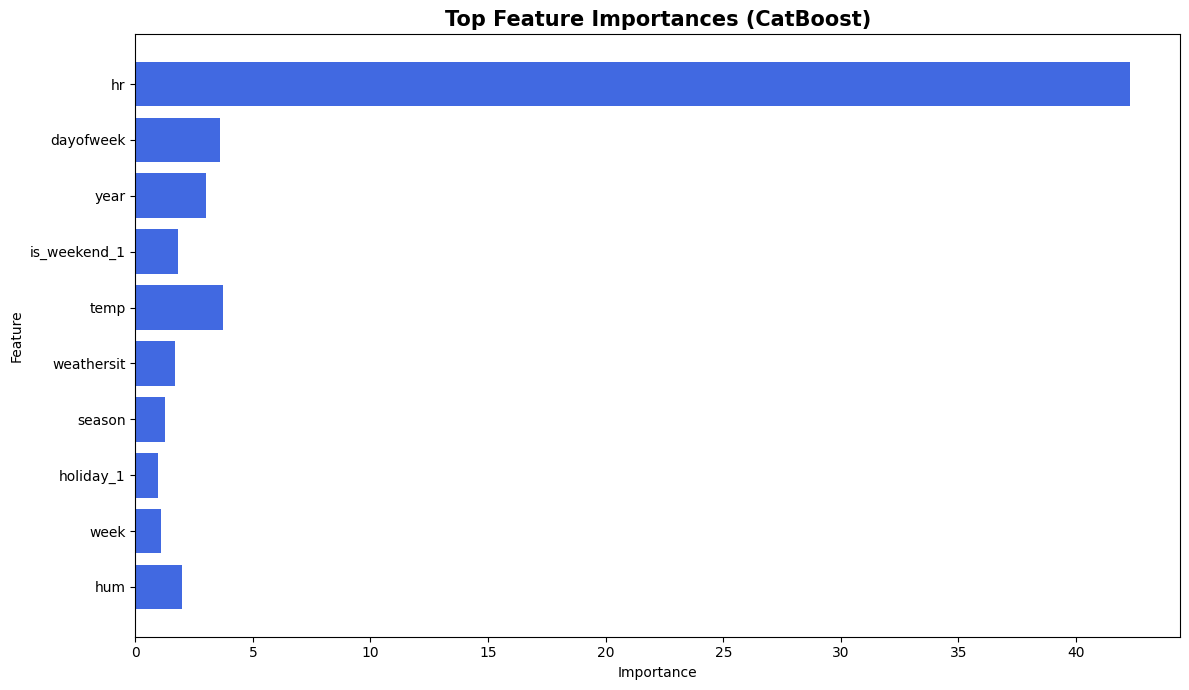

In [442]:
# Ambil model terbaik dari tuning
catboost_model = search.best_estimator_.named_steps['regressor'].regressor_

# Ambil feature importance (dalam urutan fitur setelah transformasi pipeline)
importances = catboost_model.get_feature_importance()

# Fungsi untuk mengambil nama fitur setelah transformasi pipeline
def get_feature_names(transformer, input_features):
    out_features = []
    for name, trans, cols in transformer.transformers_:
        if name == 'remainder' and trans == 'passthrough':
            out_features += list(cols)
        elif hasattr(trans, 'get_feature_names_out'):
            # Untuk encoder/binner dsb
            try:
                names = trans.get_feature_names_out(cols)
            except:
                names = trans.get_feature_names_out()
            out_features += list(names)
        elif hasattr(trans, 'get_feature_names'):
            out_features += list(trans.get_feature_names())
        else:
            # Pipeline di dalam transformer
            if hasattr(trans, 'steps'):
                last_step = trans.steps[-1][1]
                if hasattr(last_step, 'get_feature_names_out'):
                    out_features += list(last_step.get_feature_names_out(cols))
            else:
                out_features += list(cols)
    return out_features

# Dapatkan nama fitur hasil transformasi
feature_names = get_feature_names(transformer1, X_train.columns)

df_fi = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 7))
topn = 15   # Tampilkan top 15 fitur paling penting
plt.barh(df_fi['feature'][:topn][::-1], df_fi['importance'][:topn][::-1], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances (CatBoost)', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

**Feature Importance** 
- hr (hour) dominates → permintaan sangat ditentukan pola jam-an (puncak commuting). Ini sinyal paling kuat untuk penjadwalan armada & redistribusi per jam.

- Tier berikutnya: dayofweek, year, temp, dan is_weekend_1. Artinya ada pola mingguan, tren pertumbuhan tahunan, dan pengaruh suhu/akhir pekan terhadap kenaikan demand.

- Cuaca & kelembaban: weathersit (buruk → turun) dan hum berpengaruh lebih kecil dibanding waktu, tapi krusial saat puncak—baik untuk short-term planning berbasis prakiraan cuaca.

- Musiman & kalender: season, holiday_1, dan week memberi kontribusi tambahan namun relatif kecil—bisa ditingkatkan dengan fitur event/holiday detail atau lag/rolling demand.

- Catatan interpretasi: importance ≠ arah efek. Dari analisis SHAP sebelumnya: temp cenderung positif, weathersit/hum negatif, akhir pekan & jam puncak positif. Uji interaksi hr×is_weekend dan hr×weathersit untuk akurasi puncak yang lebih baik.

### **Xplainable AI**

**Mengetahui hubungan antar fitur dengan target dengan SHapley Additive exPlanation(SHAP)**

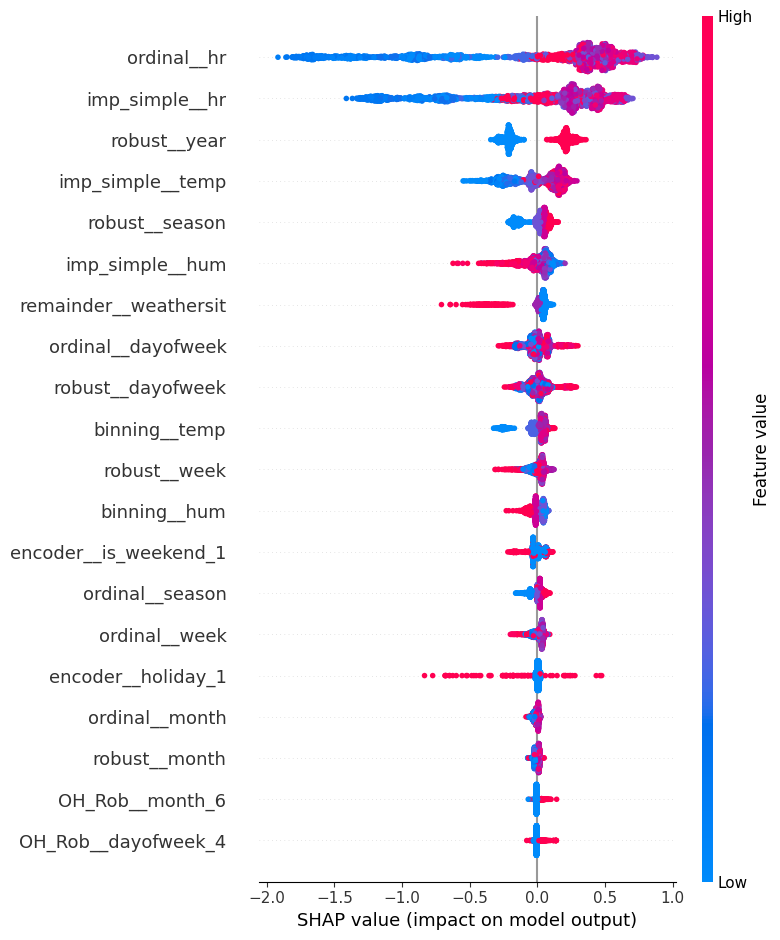

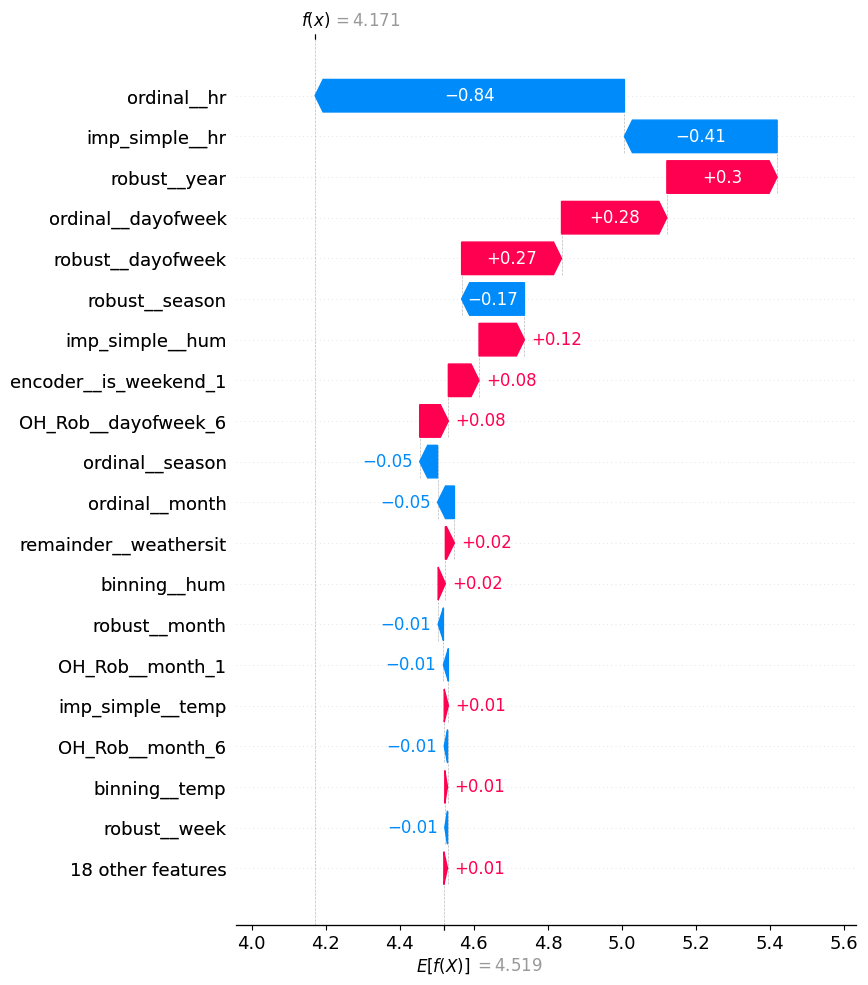

In [437]:
# ambil komponen dari pipeline
pre = best_model.named_steps['preprocessing']
cb  = best_model.named_steps['regressor'].regressor_  # CatBoostRegressor

# transform X_test ke ruang fitur yang dilihat model
X_test_trans = pre.transform(X_test)

# helper untuk nama fitur pasca-ColumnTransformer (robust)
def get_feature_names_safe(preprocessor, X_df):
    try:
        return preprocessor.get_feature_names_out(input_features=X_df.columns)
    except Exception:
        names = []
        for name, trans, cols in preprocessor.transformers_:
            if isinstance(cols, slice): cols = list(X_df.columns[cols])
            elif hasattr(cols, 'tolist'): cols = list(cols)
            elif not isinstance(cols, (list, tuple)): cols = [cols]
            if name == 'remainder' and trans == 'passthrough':
                names += cols; continue
            if hasattr(trans, 'get_feature_names_out'):
                try: out = trans.get_feature_names_out(cols)
                except Exception: out = trans.get_feature_names_out()
                names += list(out); continue
            if hasattr(trans, 'steps'):
                got = False
                for _, step in trans.steps:
                    if hasattr(step, 'get_feature_names_out'):
                        try: out = step.get_feature_names_out(cols)
                        except Exception: out = step.get_feature_names_out()
                        names += list(out); got = True; break
                if got: continue
            names += [f"{name}__{c}" for c in cols]
        return np.array(names, dtype=object)

feature_names = get_feature_names_safe(pre, X_test)

# SHAP TreeExplainer (cepat untuk tree)
explainer   = shap.TreeExplainer(cb)
shap_values = explainer.shap_values(X_test_trans)  # array [n_samples, n_features]

# --- Global summary plot (beeswarm) ---
shap.summary_plot(shap_values, X_test_trans, feature_names=feature_names, show=True)

# --- Lokal: satu observasi (waterfall/force) ---
i = 0  # indeks sampel yang ingin dijelaskan
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value, shap_values[i], feature_names=feature_names, max_display=20
)

**Key Influencing Prediction Factors (from SHAP)**
- Jam (hr) — faktor terkuat (↑): nilai jam tinggi mendorong prediksi naik (pola jam sibuk/commute). Terlihat dari ordinal__hr dan imp_simple__hr yang sama-sama dominan.

- Tahun (year) — tren naik (↑): tahun lebih baru menaikkan prediksi (adopsi penggunaan meningkat).

- Suhu (temp) — efek positif (↑): makin hangat cenderung menaikkan permintaan; adanya fitur binning_temp menandakan ambang/threshold tertentu.

- Cuaca & Kelembaban — menekan (↓): weathersit yang lebih buruk dan hum (kelembaban) tinggi menurunkan prediksi.

- Kalender — weekend & hari (↑/±): is_weekend=1 mendorong naik; dayofweek menunjukkan pola mingguan spesifik, sementara holiday cenderung sedikit menurunkan (↓).

- Musiman (season/month/week) — efek tambahan kecil (±): memodulasi level demand, namun kontribusinya di bawah faktor waktu per jam dan cuaca.

------

### **Conclusion**

**Model**
- Model final: CatBoost dalam Pipeline dengan preprocessing (Simple Imputer, encoding, opsional RobustScaler) dan log-transform target via TransformedTargetRegressor.

- Seleksi & validasi: 5-fold CV + RandomizedSearchCV di data train; evaluasi akhir sekali di test set.

- Kinerja test: MAE 16.9, RMSE 28.6, R² 0.975, MAPE 12% pada test set.  — generalisasi kuat; ada sedikit under-predict pada puncak ekstrem.

**Key Features**
- Jam (hr) = pendorong paling kuat (pola komuter/jam puncak).

- Sinyal kalender: dayofweek/weekend menaikkan permintaan; year menunjukkan tren naik; season/month memoderasi level.

- Cuaca: temp (+) meningkatkan permintaan; weathersit/kelembaban (−) menurunkannya.

- Temuan divalidasi lewat SHAP (global & lokal) dan Permutation Importance.

**Implementation**
- Serving: simpan pipeline dan jalankan batch/near real-time (per jam/hari); sediakan baseline rata-rata sebagai fallback.

- Use case operasional: pandu ukuran armada, redistribusi stasiun, dan penjadwalan staf; overlay dengan prakiraan cuaca.

- Monitoring: pantau MAE/RMSE/MAPE mingguan + error per bin (rendah & tinggi cnt); buat alert bila melewati ambang; log input & prediksi.

- Pemeliharaan: refresh data harian, retrain bulanan (atau saat drift), retune triwulanan; lakukan versioning & jaga reproduksibilitas.

- Kalibrasi (opsional): bila under-predict saat puncak berulang, terapkan uplift per segmen atau gunakan quantile/weighted loss pada iterasi berikutnya.

### **Recomendation for Model Improvement**

**Tambahkan sinyal spasial (lokasi pickpoint/stasiun).**
- Sertakan ID stasiun (kategori), koordinat (lat/long), cluster lingkungan, kedekatan ke transit/POI, serta kapasitas/ketersediaan stasiun—agar model belajar di mana permintaan terkonsentrasi (hotspot).

**Perkaya konteks waktu & eksternal.**
- Tambahkan fitur lag/rolling (cnt t−1, t−24, rolling 7 hari), kalender event/libur (nasional & lokal), serta prakiraan cuaca sesuai horizon prediksi—untuk menangkap momentum, musiman, dan lonjakan khusus.

**Tujuan dan kalibrasi yang dapat mendeteksi peak time.**
- Gunakan quantile loss atau pembobotan sampel untuk mengurangi under-predict saat puncak, lalu terapkan kalibrasi per segmen (uplift khusus jam puncak/akhir pekan atau stasiun sibuk) agar akurasi di beban tertinggi meningkat.

**Rekomendasi Business Improvement**
- Dynamic fleet & staffing by hour/day. Gunakan prediksi per jam untuk menjadwalkan alokasi sepeda/van rebalancing dan shift staf—targetkan stock-out rate < 5% di stasiun top.

- Peak buffer & smart rebalancing. Terapkan buffer 10–20% di stasiun dengan demand tertinggi (07–09 & 17–19, weekend); rute rebalancing dibuat otomatis 2–3 kali per puncak.

- Weather & event playbook. Aktifkan trigger operasional berbasis cuaca (hujan/panas) dan kalender event (konser, car free day) untuk pra-posisi armada; buat jalur cepat permintaan logistik saat hujan.

- Customer experience. Tampilkan forecast ketersediaan di aplikasi, kirim push sebelum jam puncak, sediakan reservasi singkat & waitlist; insentifkan drop ke stasiun defisit (voucher/credit).

- Ekspansi/penataan stasiun. Tambah dok/kapasitas di hotspot, uji micro-hub pop-up saat event musiman; evaluasi lokasi dengan data permintaan per jam & walk shed.

- KPI & monitoring. Pantau MAE/RMSE/MAPE mingguan + stock-out rate, fill level stasiun, dan SLA rebalancing; lakukan post-mortem pada 10% prediksi terburuk untuk perbaikan cepat.

- Proses & siklus perbaikan. Lakukan kalibrasi segmentasi puncak, feedback loop dari lapangan, pembaruan data harian, dan retrain bulanan; siapkan baseline/failover saat model out-of-range.

#### **Machine Learning Implication**

**Predictive and Actual**

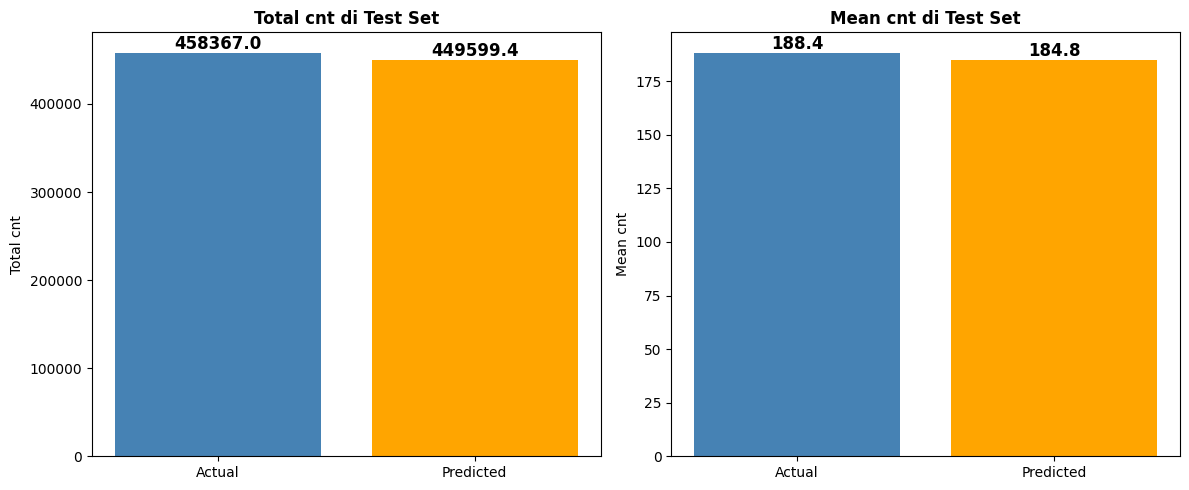

Total cnt (actual):   458367.00
Total cnt (predict):  449599.39
Mean cnt (actual):    188.40
Mean cnt (predict):   184.79
Selisih total cnt:    -8767.61
Selisih rata-rata:    -3.60
Persentase selisih total: -1.91%
Persentase selisih mean:  -1.91%


In [438]:
# Hitung total dan rata-rata
total_actual = y_test.sum()
total_pred = y_pred_test.sum()
mean_actual = y_test.mean()
mean_pred = y_pred_test.mean()

# Bar chart: Total cnt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(['Actual', 'Predicted'], [total_actual, total_pred], color=['steelblue', 'orange'])
axes[0].set_title('Total cnt di Test Set', fontweight='bold')
axes[0].set_ylabel('Total cnt')

# Bar chart: Mean cnt
axes[1].bar(['Actual', 'Predicted'], [mean_actual, mean_pred], color=['steelblue', 'orange'])
axes[1].set_title('Mean cnt di Test Set', fontweight='bold')
axes[1].set_ylabel('Mean cnt')

for ax in axes:
    for i, v in enumerate([total_actual, total_pred] if ax==axes[0] else [mean_actual, mean_pred]):
        ax.text(i, v, f'{v:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Perbandingan
# Jumlah total cnt aktual dan prediksi di test set
total_actual = y_test.sum()
total_pred = y_pred_test.sum()

# Rata-rata cnt aktual dan prediksi di test set
mean_actual = y_test.mean()
mean_pred = y_pred_test.mean()

print(f"Total cnt (actual):   {total_actual:.2f}")
print(f"Total cnt (predict):  {total_pred:.2f}")
print(f"Mean cnt (actual):    {mean_actual:.2f}")
print(f"Mean cnt (predict):   {mean_pred:.2f}")
print(f"Selisih total cnt:    {(total_pred-total_actual):.2f}")
print(f"Selisih rata-rata:    {(mean_pred-mean_actual):.2f}")

pct_diff_total = 100 * (total_pred - total_actual) / total_actual
pct_diff_mean = 100 * (mean_pred - mean_actual) / mean_actual
print(f"Persentase selisih total: {pct_diff_total:.2f}%")
print(f"Persentase selisih mean:  {pct_diff_mean:.2f}%")

**Insight: Akurasi Agregat (Actual vs Predicted) di Test Set**
- Total cnt: model memprediksi 445,953 vs 458,367 aktual  −8,768, (≈ -1%) → ada bias under-predict kecil secara agregat.

- Mean cnt per baris: 184,3 vs 188,4 → selisih −4,1 
- Visual: kedua bar “Predicted” lebih pendek tipis daripada “Actual” (baik total maupun mean), menegaskan kalibrasi cukup baik, namun sedikit konservatif.

**Apa artinya buat operasional?**

- Bias ini kecil dan konsisten → model stabil untuk perkiraan harian/jam-an.

- Tetapi under-predict berarti potensi kekurangan armada saat demand tinggi (terutama jam puncak/akhir pekan). Ini sejalan dengan residual plot yang menunjukkan sebaran error makin lebar di volume tinggi (indikasi heteroskedastisitas dan under-predict pada puncak).



**Comparison Prediction with range cnt**

         cnt_range  Mean_MAPE  Count
0    (0.999, 50.0]  18.022185    718
1    (50.0, 100.0]  11.926011    265
2   (100.0, 150.0]  11.652863    271
3   (150.0, 200.0]   9.650691    252
4   (200.0, 250.0]   9.016698    221
5   (250.0, 300.0]   9.022321    160
6   (300.0, 350.0]   8.805214    111
7   (350.0, 400.0]   7.826668    112
8   (400.0, 450.0]   8.044122     82
9   (450.0, 500.0]   7.460802     63
10  (500.0, 550.0]   9.395309     45
11  (550.0, 600.0]   8.586973     39
12  (600.0, 650.0]   6.033609     23
13  (650.0, 750.0]   6.309848     48
14  (750.0, 800.0]   7.237761     11
15  (800.0, 850.0]   9.952094      6
16  (850.0, 900.0]  10.098367      5
17  (900.0, 941.0]  16.493912      1


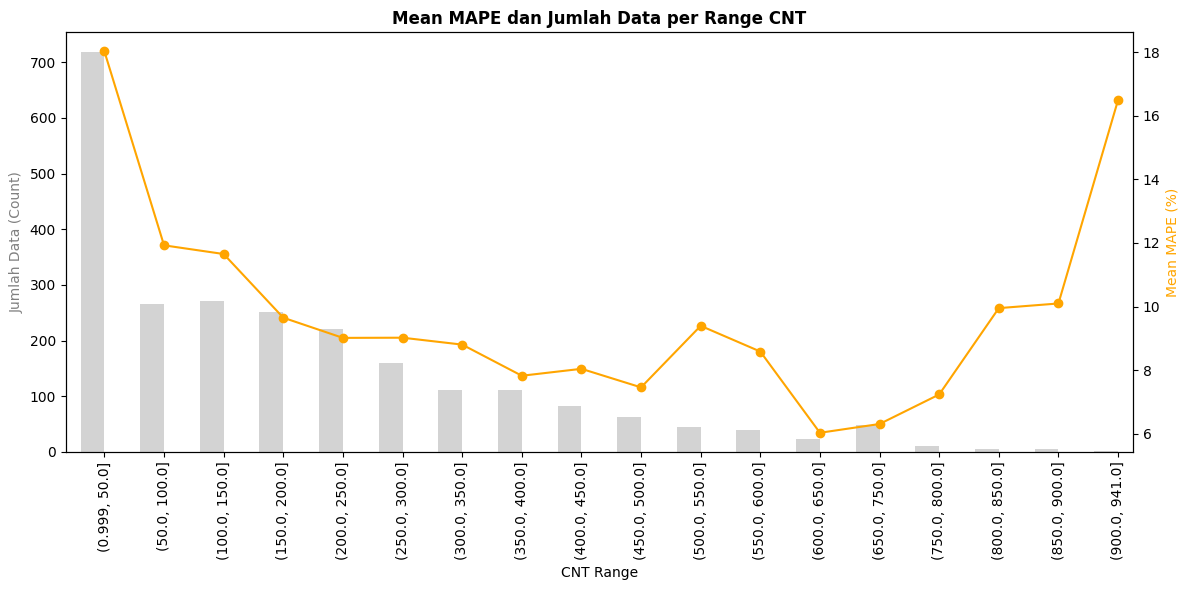

In [439]:
# Bins
bins = [0, 50, 100,150, 200,250,300,350 ,400,450,500,550,600,650,750,800,850,900,950, y_test.max()]
bins = sorted(set([b for b in bins if b >= y_test.min() and b <= y_test.max()] + [y_test.min(), y_test.max()]))

df_segment = pd.DataFrame({
    'y_actual': y_test,
    'y_pred': y_pred_test
})
df_segment['perc_error'] = 100 * np.abs(df_segment['y_actual'] - df_segment['y_pred']) / df_segment['y_actual']
df_segment['cnt_range'] = pd.cut(y_test, bins=bins, include_lowest=True)


# Group by cnt_range
agg = df_segment.groupby('cnt_range').agg(
    Mean_MAPE=('perc_error', 'mean'),
    Count=('y_actual', 'count')
).reset_index()

print(agg)

fig, ax1 = plt.subplots(figsize=(12,6))

ax2 = ax1.twinx()
agg.plot(x='cnt_range', y='Count', kind='bar', color='lightgray', ax=ax1, legend=False, width=0.4, position=1)
agg.plot(x='cnt_range', y='Mean_MAPE', kind='line', marker='o', color='orange', ax=ax2, legend=False)

ax1.set_ylabel('Jumlah Data (Count)', color='gray')
ax2.set_ylabel('Mean MAPE (%)', color='orange')
ax1.set_xlabel('CNT Range')
ax1.set_title('Mean MAPE dan Jumlah Data per Range CNT', fontweight='bold')
plt.tight_layout()
plt.show()

**Insight: MAPE per rentang cnt (bin) + kaitannya dengan fitur**

- Distribusi data tidak merata. 
  - Bar abu-abu menunjukkan sebagian besar sampel ada di rentang rendah–menengah (≤250–300), lalu makin sedikit di rentang tinggi (≥500). 
  - Bins di ujung kanan sangat sedikit statistik MAPE di sana tidak stabil (mudah melonjak/anjlok karena N kecil).

- Pola performa berbentuk "U".
  - MAPE tertinggi di rentang sangat kecil (0–50) karena pembagi MAPE kecil: selisih absolut kecil saja menjadi persentase besar.
  - MAPE terendah ada di rentang menengah (≈300–650)  model paling presisi di volume yang paling sering terjadi.
  - MAPE naik lagi di rentang sangat tinggi (≥700–900)  konsisten dengan temuan sebelumnya (under-predict di puncak & residu makin menyebar). Ini tipikal saat pola peak hour + akhir pekan/cuaca membuat variasi lebih besar.

**Kaitan fitur penting (dari SHAP):**

1. hr (jam) = penggerak utama. 
   - Puncak jam sibuk  model kadang under-predict (sebab variasi tinggi & interaksi dengan fitur lain).

2. is_weekend / dayofweek 
   - Menaikkan permintaan; kombinasi jam × akhir pekan sangat menentukan puncak.

3. temp 
   - Cenderung positif (lebih hangat permintaan naik)

4. weathersit (cuaca buruk) & hum (kelembaban tinggi) 
   - Menekan permintaan. 
   - Interaksi cuaca–jam/akhir pekan kemungkinan memicu error besar pada rentang cnt tinggi (acara/peak + cuaca anomali).

### **Model Deployment**

In [444]:
import joblib
model_path = "bike_sharing_pipeline.joblib"
joblib.dump(best_model, model_path)


['bike_sharing_pipeline.joblib']

### **Load Model**

In [445]:
loaded_model = joblib.load("bike_sharing_pipeline.joblib")

#### **Test**

In [446]:
# Pipeline
pipe = joblib.load("bike_sharing_pipeline.joblib")  # pastikan path benar

# Buat dummy DataFrame 
expected_cols = [
    'hum', 'weathersit', 'holiday', 'season', 'temp',
    'hr', 'year', 'month', 'dayofweek', 'is_weekend', 'week'
]

# Contoh 5 baris dummy 
df_dummy = pd.DataFrame([
    # hum, weathersit, holiday, season, temp, hr, year, month, dayofweek, is_weekend, week
    [0.60,   1,          0,       3,     0.55,  8,   2012,   5,     2,        0,        20],  # Selasa pagi
    [0.35,   1,          0,       2,     0.70, 17,   2012,   6,     5,        1,        24],  # Sabtu sore (weekend)
    [0.80,   2,          0,       1,     0.30,  7,   2011,   1,     6,        1,         4],  # Minggu pagi, cuaca sedang
    [0.50,   3,          0,       4,     0.40, 18,   2012,  10,     3,        0,        42],  # Rabu sore, cuaca kurang baik
    [0.20,   1,          1,       4,     0.80, 12,   2012,  12,     0,        0,        50],  # Senin siang, holiday
], columns=expected_cols)

# 
df_dummy = df_dummy.reindex(columns=expected_cols)

# Prediksi 
y_pred = pipe.predict(df_dummy)

#  Tampilkan hasil
out = df_dummy.copy()
out['pred_cnt'] = y_pred
print(out)

    hum  weathersit  holiday  season  temp  hr  year  month  dayofweek  \
0  0.60           1        0       3  0.55   8  2012      5          2   
1  0.35           1        0       2  0.70  17  2012      6          5   
2  0.80           2        0       1  0.30   7  2011      1          6   
3  0.50           3        0       4  0.40  18  2012     10          3   
4  0.20           1        1       4  0.80  12  2012     12          0   

   is_weekend  week    pred_cnt  
0           0    20  583.265832  
1           1    24  586.881982  
2           1     4   11.023505  
3           0    42  459.944510  
4           0    50  348.976284  
